# <center> M4 T01: Algoritmes d'aprenentatge Supervisat: Regressions

## Limpieza (y algo de "Ingeniería")
Vuelvo a realizar varios de los pasos de los anteriores ejercicios, pero modificando algunas cosas, y creo que tomando mejores decisiones.

In [1]:
# Importo algunas de las librerías que voy a utilizar:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn as sbrn

In [2]:
# Especifico que no se oculten columnas:
#pandas.set_option('display.max_columns', None)

Importo el archivo CSV y elimino la columna '**Unnamed: 0**':

In [227]:
# Almaceno en un dataframe el csv:
flights = pandas.read_csv('./input/DelayedFlights.csv')

# Elimino la columna 'Unnamed: 0', correspondiente a los índices originales:
del(flights['Unnamed: 0'])

flights

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [228]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

Compruebo la cantidad de **valores null** por cada columna:

In [229]:
flights.isna().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

**Elimino todos los registros con valores null**, porque he comprobado en otros ejercicios que corresponden casi en su totalidad a vuelos cancelados a desviados, que no nos interesan para predecir retrasos (porque no incluyen esa información):

In [230]:
# Elimino todos los registros con valores null:
flights.dropna(inplace=True)

# Reseteo los índices:
flights.reset_index(drop=True, inplace=True)

Compruebo la cantidad de **valores únicos** en cada columna:

In [231]:
flights.nunique()

Year                    1
Month                  12
DayofMonth             31
DayOfWeek               7
DepTime              1435
CRSDepTime           1182
ArrTime              1440
CRSArrTime           1350
UniqueCarrier          20
FlightNum            7481
TailNum              5349
ActualElapsedTime     668
CRSElapsedTime        497
AirTime               645
ArrDelay             1044
DepDelay             1053
Origin                302
Dest                  301
Distance             1404
TaxiIn                180
TaxiOut               332
Cancelled               1
CancellationCode        1
Diverted                1
CarrierDelay          983
WeatherDelay          599
NASDelay              574
SecurityDelay         156
LateAircraftDelay     564
dtype: int64

Después de la eliminación de los nulls, las columnas '**Cancelled**', '**CancellationCode**', y '**Diverted**' solo tienen un valor único, asi que las elimino:

In [232]:
flights.drop(['Cancelled','CancellationCode','Diverted'], axis='columns', inplace=True)

Las columnas '**CarrierDelay**', '**WeatherDelay**', '**NASDelay**', '**SecurityDelay**' y '**LateAircraftDelay**' en nuestro caso no aportan más información que la columna '**ArrDelay**', porque se refieren a las posibles causas de los retrasos (y de ellas se desprenden los valores de la columna 'ArrDelay'). Además, entiendo que no contaremos con esos datos hasta que los vuelos lleguen a destino, así que también decido eliminarlas:

In [233]:
flights.drop(['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis='columns', inplace=True)

Entiendo que tampoco contaremos con los datos de las columnas '**ActualElapsedTime**', '**AirTime**' y '**ArrTime**', así que también las elimino:

In [234]:
flights.drop(['ActualElapsedTime','AirTime','ArrTime'], axis='columns', inplace=True)

También elimino las columnas '**TaxiIn**' y '**TaxiOut**', que me parecen poco importantes:

In [235]:
flights.drop(['TaxiIn','TaxiOut'], axis='columns', inplace=True)

Finalmente, almaceno la fecha en una columna de tipo **datetime** ('**Date**'), y borro la columna '**Year**' (porque solo tiene un valor), pero conservo las demás columnas que hacen referencia a la fecha:

In [236]:
# Renombro la columna 'DayofMonth' por 'Day', porque lo requiere la sintaxis del comando siguiente:
flights.rename(columns={'DayofMonth':'Day'}, inplace=True)

# Creo la columna 'Date', con los valores de las columnas 'Year', 'Month' y 'Day':
flights['Date'] = pandas.to_datetime(flights[['Year','Month','Day']])

# Elimino la columna 'Year', pero dejo las columnas 'Month', 'Day' y 'DayOfWeek' porque creo que pueden ser datos útiles:
flights.drop(['Year'], axis='columns', inplace=True)

flights

,Month,Day,DayOfWeek,DepTime,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance,Date
0,1,3,4,1829.0,1755,1925,WN,3920,N464WN,90.0,34.0,34.0,IND,BWI,515,2008-01-03
1,1,3,4,1937.0,1830,1940,WN,509,N763SW,250.0,57.0,67.0,IND,LAS,1591,2008-01-03
2,1,3,4,1644.0,1510,1725,WN,1333,N334SW,135.0,80.0,94.0,IND,MCO,828,2008-01-03
3,1,3,4,1452.0,1425,1625,WN,675,N286WN,240.0,15.0,27.0,IND,PHX,1489,2008-01-03
4,1,3,4,1323.0,1255,1510,WN,4,N674AA,135.0,16.0,28.0,IND,TPA,838,2008-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247481,12,13,6,921.0,830,1008,DL,1616,N907DE,98.0,64.0,51.0,ATL,PBI,545,2008-12-13
1247482,12,13,6,1552.0,1520,1718,DL,1620,N905DE,58.0,17.0,32.0,HSV,ATL,151,2008-12-13
1247483,12,13,6,1250.0,1220,1552,DL,1621,N938DL,152.0,25.0,30.0,MSP,ATL,906,2008-12-13
1247484,12,13,6,657.0,600,749,DL,1631,N3743H,109.0,75.0,57.0,RIC,ATL,481,2008-12-13


Compruebo la correlación de todas las variables numéricas entre si (si no me equivoco da un poco de pena):

In [237]:
flights.corr().round(3)

,Month,Day,DayOfWeek,DepTime,CRSDepTime,CRSArrTime,FlightNum,CRSElapsedTime,ArrDelay,DepDelay,Distance
Month,1.000,0.067,0.009,-0.009,-0.013,-0.002,0.003,0.007,0.012,0.015,0.006
Day,0.067,1.000,0.026,0.003,0.004,0.004,-0.005,0.001,0.009,0.010,-0.000
DayOfWeek,0.009,0.026,1.000,0.021,0.028,0.017,-0.010,0.006,0.012,0.014,0.009
DepTime,-0.009,0.003,0.021,1.000,0.840,0.714,-0.032,-0.041,0.094,0.116,-0.055
CRSDepTime,-0.013,0.004,0.028,0.840,1.000,0.726,-0.067,-0.022,0.017,0.040,-0.025
CRSArrTime,-0.002,0.004,0.017,0.714,0.726,1.000,-0.072,0.048,0.025,0.040,0.032
FlightNum,0.003,-0.005,-0.010,-0.032,-0.067,-0.072,1.000,-0.342,0.036,0.034,-0.363
CRSElapsedTime,0.007,0.001,0.006,-0.041,-0.022,0.048,-0.342,1.000,0.032,0.028,0.981
ArrDelay,0.012,0.009,0.012,0.094,0.017,0.025,0.036,0.032,1.000,0.950,0.015
DepDelay,0.015,0.010,0.014,0.116,0.040,0.040,0.034,0.028,0.950,1.000,0.014


Compruebo la correlación de todas las variables numéricas con la variable objetivo ('**ArrDelay**'), ordenándolas de mayor correlación a menor correlación:

In [238]:
flights.corr()['ArrDelay'].sort_values(ascending=False).round(3)

ArrDelay          1.000
DepDelay          0.950
DepTime           0.094
FlightNum         0.036
CRSElapsedTime    0.032
CRSArrTime        0.025
CRSDepTime        0.017
Distance          0.015
Month             0.012
DayOfWeek         0.012
Day               0.009
Name: ArrDelay, dtype: float64

Compruebo visualmente la correlación entre las columnas numéricas, con un **heatmap**:

<AxesSubplot:>

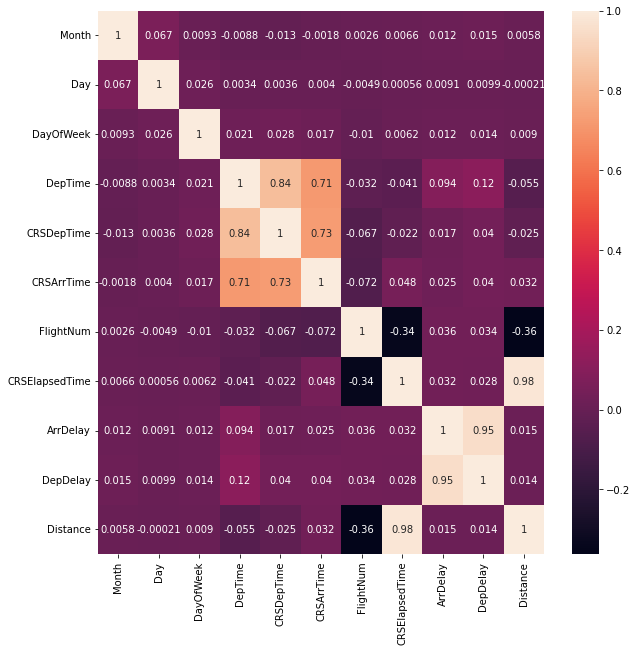

In [239]:
plt.figure(figsize=(10, 10))

sbrn.heatmap(data=flights.corr(), annot=True)

Como presuponía, la columna '**FlightNum**' no es útil para predecir la variable objetivo, así que decido eliminarla, y la misma suerte correrá la columna '**TailNum**', que es similar (pero he de decir que solo pinta bien **DepDelay**):

In [240]:
flights.drop(['FlightNum','TailNum'], axis='columns', inplace=True)

Algunas columnas con medidas temporales tienen tipo de datos **int64** y otras tienen tipo de datos **float64** (aunque no tienen decimales), así que convierto el tipo de datos de estas últimas (supongo que no es realmente necesario, pero ayuda a mejorar la visualización):

In [241]:
flights[['DepTime','CRSElapsedTime','ArrDelay','DepDelay']] = flights[['DepTime','CRSElapsedTime','ArrDelay','DepDelay']].astype('int64')

flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247486 entries, 0 to 1247485
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Month           1247486 non-null  int64         
 1   Day             1247486 non-null  int64         
 2   DayOfWeek       1247486 non-null  int64         
 3   DepTime         1247486 non-null  int64         
 4   CRSDepTime      1247486 non-null  int64         
 5   CRSArrTime      1247486 non-null  int64         
 6   UniqueCarrier   1247486 non-null  object        
 7   CRSElapsedTime  1247486 non-null  int64         
 8   ArrDelay        1247486 non-null  int64         
 9   DepDelay        1247486 non-null  int64         
 10  Origin          1247486 non-null  object        
 11  Dest            1247486 non-null  object        
 12  Distance        1247486 non-null  int64         
 13  Date            1247486 non-null  datetime64[ns]
dtypes: datetime64[ns](

Copio el dataframe en uno nuevo, y aprovecho para ordenar las columnas a mi gusto:

In [242]:
flights_clean = flights[['CRSDepTime','DepTime','CRSArrTime','CRSElapsedTime','DepDelay','ArrDelay','UniqueCarrier','Origin','Dest','Distance','Date','Month','Day','DayOfWeek']]
                         
flights_clean

,CRSDepTime,DepTime,CRSArrTime,CRSElapsedTime,DepDelay,ArrDelay,UniqueCarrier,Origin,Dest,Distance,Date,Month,Day,DayOfWeek
0,1755,1829,1925,90,34,34,WN,IND,BWI,515,2008-01-03,1,3,4
1,1830,1937,1940,250,67,57,WN,IND,LAS,1591,2008-01-03,1,3,4
2,1510,1644,1725,135,94,80,WN,IND,MCO,828,2008-01-03,1,3,4
3,1425,1452,1625,240,27,15,WN,IND,PHX,1489,2008-01-03,1,3,4
4,1255,1323,1510,135,28,16,WN,IND,TPA,838,2008-01-03,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247481,830,921,1008,98,51,64,DL,ATL,PBI,545,2008-12-13,12,13,6
1247482,1520,1552,1718,58,32,17,DL,HSV,ATL,151,2008-12-13,12,13,6
1247483,1220,1250,1552,152,30,25,DL,MSP,ATL,906,2008-12-13,12,13,6
1247484,600,657,749,109,57,75,DL,RIC,ATL,481,2008-12-13,12,13,6


Hay un problema con la relación entre las columnas **DepTime** y **CRSDepTime**, y es que cuando cambia el día la hora vuelve a 0, y eso hace que unos cuantos registros tengan mal explicitada esa relación.  
He intentado solucionarlo sin iterar (que es lo óptimo), pero al final he desistido y lo he hecho iterando, porque son muchas las comprobaciones que hay que hacer, y es complicado hacerlas con **loc** o **apply**.  
A la columna **CRSArrTime** le pasa algo similar, así que también la he modificado (pero en ese caso influyen más factores, así que la solución que he aplicado con esa columna no es 100% correcta, pero casi).

> Tenía pensado aplicar esta transformación en el **ejercicio 5** (donde creo que encajaría perfectamente), pero al final he preferido aplicarla desde el principio, y en ese ejercicio probar la diferencia entre el **StandardScaler** (que utlizaré en la primera transformación) y el **RobustScaler** (que probaré en ese ejercicio).  
> Quizá a eso no se le podría llamar "ingeniería de variables", pero creo que es más útil probar la diferencia entre los dos escalados.  
> Como ejemplo de "ingeniería de variables" espero que tomes en cuenta esta transformación que voy a hacer ahora, xD.

In [243]:
# Necesito importar esta libreria para obtener el numero de dígitos de los valores de las columnas 'DepTime' y 'CRSArrTime':
import math

# Itero los índices del dataframe:
for ind in flights_clean.index:

    # Compruebo si 'DepTime' es menor que'CRSDepTime', y 'DepDelay' es mayor que "1440":
    if (flights_clean.at[ind,'DepTime'] < flights_clean.at[ind,'CRSDepTime']) & (flights_clean.at[ind,'DepDelay'] >= 1440):
        
        # Modifico el valor de la columna 'DepTime', de una forma u otra dependiendo de la cantidad de dígitos que tenga:
        if flights_clean.at[ind,'DepTime'] == 0:
            flights_clean.at[ind,'DepTime'] = int("480" + str(flights_clean.at[ind,'DepTime']))
        elif int(math.log10(flights_clean.at[ind,'DepTime']) + 1) == 1:
            flights_clean.at[ind,'DepTime'] = int("480" + str(flights_clean.at[ind,'DepTime']))
        elif int(math.log10(flights_clean.at[ind,'DepTime']) + 1) == 2:
            flights_clean.at[ind,'DepTime'] = int("48" + str(flights_clean.at[ind,'DepTime']))
        elif int(math.log10(flights_clean.at[ind,'DepTime']) + 1) == 3:
            flights_clean.at[ind,'DepTime'] = int(str(48 + int(str(flights_clean.at[ind,'DepTime'])[0])) + str(flights_clean.at[ind,'DepTime'])[1:])
        elif int(math.log10(flights_clean.at[ind,'DepTime']) + 1) == 4:
            flights_clean.at[ind,'DepTime'] = int(str(48 + int(str(flights_clean.at[ind,'DepTime'])[0:2])) + str(flights_clean.at[ind,'DepTime'])[2:])
            
        # Modifico el valor de la columna 'CRSArrTime', de una forma u otra dependiendo de la cantidad de dígitos que tenga:
        if flights_clean.at[ind,'CRSArrTime'] == 0:
            flights_clean.at[ind,'CRSArrTime'] = int("480" + str(flights_clean.at[ind,'CRSArrTime']))
        elif int(math.log10(flights_clean.at[ind,'CRSArrTime']) + 1) == 1:
            flights_clean.at[ind,'CRSArrTime'] = int("480" + str(flights_clean.at[ind,'CRSArrTime']))
        elif int(math.log10(flights_clean.at[ind,'CRSArrTime']) + 1) == 2:
            flights_clean.at[ind,'CRSArrTime'] = int("48" + str(flights_clean.at[ind,'CRSArrTime']))
        elif int(math.log10(flights_clean.at[ind,'CRSArrTime']) + 1) == 3:
            flights_clean.at[ind,'CRSArrTime'] = int(str(48 + int(str(flights_clean.at[ind,'CRSArrTime'])[0])) + str(flights_clean.at[ind,'CRSArrTime'])[1:])
        #elif int(math.log10(flights_clean.at[ind,'CRSArrTime']) + 1) == 4:
            #flights_clean.at[ind,'CRSArrTime'] = int(str(48 + int(str(flights_clean.at[ind,'CRSArrTime'])[0:2])) + str(flights_clean.at[ind,'CRSArrTime'])[2:])
            
    # Compruebo si 'DepTime' es menor que'CRSDepTime', y 'DepDelay' es menor que "1440":
    elif (flights_clean.at[ind,'DepTime'] < flights_clean.at[ind,'CRSDepTime']) & (flights_clean.at[ind,'DepDelay'] < 1440):
        
        # Modifico el valor de la columna 'DepTime', de una forma u otra dependiendo de la cantidad de dígitos que tenga:
        if flights_clean.at[ind,'DepTime'] == 0:
            flights_clean.at[ind,'DepTime'] = int("240" + str(flights_clean.at[ind,'DepTime']))
        elif int(math.log10(flights_clean.at[ind,'DepTime']) + 1) == 1:
            flights_clean.at[ind,'DepTime'] = int("240" + str(flights_clean.at[ind,'DepTime']))
        elif int(math.log10(flights_clean.at[ind,'DepTime']) + 1) == 2:
            flights_clean.at[ind,'DepTime'] = int("24" + str(flights_clean.at[ind,'DepTime']))
        elif int(math.log10(flights_clean.at[ind,'DepTime']) + 1) == 3:
            flights_clean.at[ind,'DepTime'] = int(str(24 + int(str(flights_clean.at[ind,'DepTime'])[0])) + str(flights_clean.at[ind,'DepTime'])[1:])
        elif int(math.log10(flights_clean.at[ind,'DepTime']) + 1) == 4:
            flights_clean.at[ind,'DepTime'] = int(str(24 + int(str(flights_clean.at[ind,'DepTime'])[0:2])) + str(flights_clean.at[ind,'DepTime'])[2:])

        # Modifico el valor de la columna 'CRSArrTime', de una forma u otra dependiendo de la cantidad de dígitos que tenga:
        if flights_clean.at[ind,'CRSArrTime'] == 0:
            flights_clean.at[ind,'CRSArrTime'] = int("240" + str(flights_clean.at[ind,'CRSArrTime']))
        elif int(math.log10(flights_clean.at[ind,'CRSArrTime']) + 1) == 1:
            flights_clean.at[ind,'CRSArrTime'] = int("240" + str(flights_clean.at[ind,'CRSArrTime']))
        elif int(math.log10(flights_clean.at[ind,'CRSArrTime']) + 1) == 2:
            flights_clean.at[ind,'CRSArrTime'] = int("24" + str(flights_clean.at[ind,'CRSArrTime']))
        elif int(math.log10(flights_clean.at[ind,'CRSArrTime']) + 1) == 3:
            flights_clean.at[ind,'CRSArrTime'] = int(str(24 + int(str(flights_clean.at[ind,'CRSArrTime'])[0])) + str(flights_clean.at[ind,'CRSArrTime'])[1:])
        #elif int(math.log10(flights_clean.at[ind,'CRSArrTime']) + 1) == 4:
            #flights_clean.at[ind,'CRSArrTime'] = int(str(24 + int(str(flights_clean.at[ind,'CRSArrTime'])[0:2])) + str(flights_clean.at[ind,'CRSArrTime'])[2:])

flights_clean

,CRSDepTime,DepTime,CRSArrTime,CRSElapsedTime,DepDelay,ArrDelay,UniqueCarrier,Origin,Dest,Distance,Date,Month,Day,DayOfWeek
0,1755,1829,1925,90,34,34,WN,IND,BWI,515,2008-01-03,1,3,4
1,1830,1937,1940,250,67,57,WN,IND,LAS,1591,2008-01-03,1,3,4
2,1510,1644,1725,135,94,80,WN,IND,MCO,828,2008-01-03,1,3,4
3,1425,1452,1625,240,27,15,WN,IND,PHX,1489,2008-01-03,1,3,4
4,1255,1323,1510,135,28,16,WN,IND,TPA,838,2008-01-03,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247481,830,921,1008,98,51,64,DL,ATL,PBI,545,2008-12-13,12,13,6
1247482,1520,1552,1718,58,32,17,DL,HSV,ATL,151,2008-12-13,12,13,6
1247483,1220,1250,1552,152,30,25,DL,MSP,ATL,906,2008-12-13,12,13,6
1247484,600,657,749,109,57,75,DL,RIC,ATL,481,2008-12-13,12,13,6


Guardo el nuevo dataframe en un CSV, para poder hacer diferentes pruebas a partir de este punto con más facilidad:

In [ ]:
flights_clean.to_csv('./output/DelayedFlights_clean.csv', index=False)

---

---

___

## Transformación

In [31]:
# Importo el dataframe "flights_clean":
#flights_clean = pandas.read_csv('./output/DelayedFlights_clean.csv')

Escalo las columnas numéricas con **StandardScaler**:

In [6]:
# Importo la función "StandardScaler":
from sklearn.preprocessing import StandardScaler

# Uso la función "fit_transform" para escalar las variables (solo las numéricas):
scaled_std = StandardScaler().fit_transform(flights_clean.select_dtypes(include=['int64']))

# Guardo los resultados en un dataframe:
flights_num_std = pandas.DataFrame(scaled_std, columns=flights_clean.select_dtypes(include=['int64']).columns)

flights_num_std

,CRSDepTime,DepTime,CRSArrTime,CRSElapsedTime,DepDelay,ArrDelay,Distance,Month,Day,DayOfWeek
0,0.634057,0.554905,0.564295,-0.600645,-0.428891,-0.482127,-0.405079,-1.443571,-1.447221,0.009992
1,0.812129,0.801806,0.596834,1.700454,0.122314,-0.103550,1.518534,-1.443571,-1.447221,0.009992
2,0.052355,0.131973,0.130448,0.046539,0.573300,0.275028,0.154485,-1.443571,-1.447221,0.009992
3,-0.149460,-0.306962,-0.086476,1.556635,-0.545814,-0.794865,1.336184,-1.443571,-1.447221,0.009992
4,-0.553089,-0.601872,-0.335938,0.046539,-0.529111,-0.778405,0.172362,-1.443571,-1.447221,0.009992
...,...,...,...,...,...,...,...,...,...,...
1247481,-1.562164,-1.520892,-1.424896,-0.485590,-0.144937,0.011669,-0.351447,1.691282,-0.309953,1.013369
1247482,0.076098,-0.078350,0.115263,-1.060865,-0.462298,-0.761945,-1.055818,1.691282,-0.309953,1.013369
1247483,-0.636190,-0.768759,-0.244830,0.291031,-0.495704,-0.630266,0.293929,1.691282,-0.309953,1.013369
1247484,-2.108251,-2.124428,-1.986729,-0.327390,-0.044718,0.192728,-0.465862,1.691282,-0.309953,1.013369


Codifico las columnas categóricas con **get_dummies**:

In [9]:
# Codifico los valores de la columna 'UniqueCarrier':
flights_dumm_carrier = pandas.get_dummies(flights_clean['UniqueCarrier'], prefix='Carrier')

flights_dumm_carrier

,Carrier_9E,Carrier_AA,Carrier_AQ,Carrier_AS,Carrier_B6,Carrier_CO,Carrier_DL,Carrier_EV,Carrier_F9,Carrier_FL,Carrier_HA,Carrier_MQ,Carrier_NW,Carrier_OH,Carrier_OO,Carrier_UA,Carrier_US,Carrier_WN,Carrier_XE,Carrier_YV
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247481,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1247482,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1247483,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1247484,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
# Codifico los valores de la columna 'Origin':
flights_dumm_origin = pandas.get_dummies(flights_clean['Origin'], prefix='Origin')

flights_dumm_origin

,Origin_ABE,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_AKN,Origin_ALB,Origin_ALO,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BET,Origin_BFL,Origin_BGM,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BIS,Origin_BJI,Origin_BLI,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BPT,Origin_BQK,Origin_BQN,Origin_BRO,Origin_BRW,Origin_BTM,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDC,Origin_CDV,Origin_CEC,Origin_CHA,Origin_CHO,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLD,Origin_CLE,Origin_CLL,Origin_CLT,Origin_CMH,Origin_CMI,Origin_CMX,Origin_COD,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CSG,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DBQ,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DHN,Origin_DLG,Origin_DLH,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELM,Origin_ELP,Origin_ERI,Origin_EUG,Origin_EVV,Origin_EWN,Origin_EWR,Origin_EYW,Origin_FAI,Origin_FAR,Origin_FAT,Origin_FAY,Origin_FCA,Origin_FLG,Origin_FLL,Origin_FLO,Origin_FNT,Origin_FSD,Origin_FSM,Origin_FWA,Origin_GCC,Origin_GEG,Origin_GFK,Origin_GGG,Origin_GJT,Origin_GNV,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GST,Origin_GTF,Origin_GTR,Origin_GUC,Origin_HDN,Origin_HHH,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_HTS,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_INL,Origin_IPL,Origin_ISP,Origin_ITH,Origin_ITO,Origin_IYK,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_JNU,Origin_KOA,Origin_KTN,Origin_LAN,Origin_LAS,Origin_LAW,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LMT,Origin_LNK,Origin_LRD,Origin_LSE,Origin_LWB,Origin_LWS,Origin_LYH,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCN,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEI,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MKG,Origin_MLB,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MOT,Origin_MQT,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAJ,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_OME,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OTH,Origin_OTZ,Origin_OXR,Origin_PBI,Origin_PDX,Origin_PFN,Origin_PHF,Origin_PHL,Origin_PHX,Origin_PIA,Origin_PIH,Origin_PIR,Origin_PIT,Origin_PLN,Origin_PMD,Origin_PNS,Origin_PSC,Origin_PSE,Origin_PSG,Origin_PSP,Origin_PUB,Origin_PVD,Origin_PWM,Origin_RAP,Origin_RDD,Origin_RDM,Origin_RDU,Origin_RFD,Origin_RHI,Origin_RIC,Origin_RKS,Origin_RNO,Origin_ROA,Origin_ROC,Origin_ROW,Origin_RST,Origin_RSW,Origin_SAN,Origin_SAT,Origin_SAV,Origin_SBA,Origin_SBN,Origin_SBP,Origin_SCC,Origin_SCE,Origin_SDF,Origin_SEA,Origin_SFO,Origin_SGF,Origin_SGU,Origin_SHV,Origin_SIT,Origin_SJC,Origin_SJT,Origin_SJU,Origin_SLC,Origin_SLE,Origin_SMF,Origin_SMX,Origin_SNA,Origin_SPI,Origin_SPS,Origin_SRQ,Origin_STL,Origin_STT,Origin_STX,Origin_SUN,Origin_SUX,Origin_SWF,Origin_SYR,Origin_TEX,Origin_TLH,Origin_TOL,Origin_TPA,Origin_TRI,Origin_TUL,Origin_TUS,Origin_TVC,Origin_TWF,Origin_TXK,Origin_TYR,Origin_TYS,Origin_VLD,Origin_VPS,Origin_WRG,Origin_WYS,Origin_XNA,Origin_YAK,Origin_YKM,Origin_YUM
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [13]:
# Codifico los valores de la columna 'Dest':
flights_dumm_dest = pandas.get_dummies(flights_clean['Dest'], prefix='Dest')

flights_dumm_dest

,Dest_ABE,Dest_ABI,Dest_ABQ,Dest_ABY,Dest_ACK,Dest_ACT,Dest_ACV,Dest_ACY,Dest_ADK,Dest_ADQ,Dest_AEX,Dest_AGS,Dest_AKN,Dest_ALB,Dest_ALO,Dest_AMA,Dest_ANC,Dest_ASE,Dest_ATL,Dest_ATW,Dest_AUS,Dest_AVL,Dest_AVP,Dest_AZO,Dest_BDL,Dest_BET,Dest_BFL,Dest_BGM,Dest_BGR,Dest_BHM,Dest_BIL,Dest_BIS,Dest_BJI,Dest_BLI,Dest_BMI,Dest_BNA,Dest_BOI,Dest_BOS,Dest_BPT,Dest_BQK,Dest_BQN,Dest_BRO,Dest_BRW,Dest_BTM,Dest_BTR,Dest_BTV,Dest_BUF,Dest_BUR,Dest_BWI,Dest_BZN,Dest_CAE,Dest_CAK,Dest_CDC,Dest_CDV,Dest_CEC,Dest_CHA,Dest_CHO,Dest_CHS,Dest_CIC,Dest_CID,Dest_CLD,Dest_CLE,Dest_CLL,Dest_CLT,Dest_CMH,Dest_CMI,Dest_CMX,Dest_COD,Dest_COS,Dest_CPR,Dest_CRP,Dest_CRW,Dest_CSG,Dest_CVG,Dest_CWA,Dest_DAB,Dest_DAL,Dest_DAY,Dest_DBQ,Dest_DCA,Dest_DEN,Dest_DFW,Dest_DHN,Dest_DLG,Dest_DLH,Dest_DRO,Dest_DSM,Dest_DTW,Dest_EGE,Dest_EKO,Dest_ELM,Dest_ELP,Dest_ERI,Dest_EUG,Dest_EVV,Dest_EWN,Dest_EWR,Dest_EYW,Dest_FAI,Dest_FAR,Dest_FAT,Dest_FAY,Dest_FCA,Dest_FLG,Dest_FLL,Dest_FLO,Dest_FNT,Dest_FSD,Dest_FSM,Dest_FWA,Dest_GCC,Dest_GEG,Dest_GFK,Dest_GGG,Dest_GJT,Dest_GNV,Dest_GPT,Dest_GRB,Dest_GRK,Dest_GRR,Dest_GSO,Dest_GSP,Dest_GST,Dest_GTF,Dest_GTR,Dest_GUC,Dest_HDN,Dest_HHH,Dest_HLN,Dest_HNL,Dest_HOU,Dest_HPN,Dest_HRL,Dest_HSV,Dest_HTS,Dest_IAD,Dest_IAH,Dest_ICT,Dest_IDA,Dest_ILM,Dest_IND,Dest_INL,Dest_IPL,Dest_ISP,Dest_ITH,Dest_ITO,Dest_IYK,Dest_JAC,Dest_JAN,Dest_JAX,Dest_JFK,Dest_JNU,Dest_KOA,Dest_KTN,Dest_LAN,Dest_LAS,Dest_LAW,Dest_LAX,Dest_LBB,Dest_LCH,Dest_LEX,Dest_LFT,Dest_LGA,Dest_LGB,Dest_LIH,Dest_LIT,Dest_LMT,Dest_LNK,Dest_LRD,Dest_LSE,Dest_LWB,Dest_LWS,Dest_LYH,Dest_MAF,Dest_MBS,Dest_MCI,Dest_MCN,Dest_MCO,Dest_MDT,Dest_MDW,Dest_MEI,Dest_MEM,Dest_MFE,Dest_MFR,Dest_MGM,Dest_MHT,Dest_MIA,Dest_MKE,Dest_MKG,Dest_MLB,Dest_MLI,Dest_MLU,Dest_MOB,Dest_MOD,Dest_MOT,Dest_MQT,Dest_MRY,Dest_MSN,Dest_MSO,Dest_MSP,Dest_MSY,Dest_MTJ,Dest_MYR,Dest_OAJ,Dest_OAK,Dest_OGG,Dest_OKC,Dest_OMA,Dest_OME,Dest_ONT,Dest_ORD,Dest_ORF,Dest_OTH,Dest_OTZ,Dest_OXR,Dest_PBI,Dest_PDX,Dest_PFN,Dest_PHF,Dest_PHL,Dest_PHX,Dest_PIA,Dest_PIH,Dest_PIR,Dest_PIT,Dest_PLN,Dest_PMD,Dest_PNS,Dest_PSC,Dest_PSE,Dest_PSG,Dest_PSP,Dest_PVD,Dest_PWM,Dest_RAP,Dest_RDD,Dest_RDM,Dest_RDU,Dest_RFD,Dest_RHI,Dest_RIC,Dest_RKS,Dest_RNO,Dest_ROA,Dest_ROC,Dest_ROW,Dest_RST,Dest_RSW,Dest_SAN,Dest_SAT,Dest_SAV,Dest_SBA,Dest_SBN,Dest_SBP,Dest_SCC,Dest_SCE,Dest_SDF,Dest_SEA,Dest_SFO,Dest_SGF,Dest_SGU,Dest_SHV,Dest_SIT,Dest_SJC,Dest_SJT,Dest_SJU,Dest_SLC,Dest_SLE,Dest_SMF,Dest_SMX,Dest_SNA,Dest_SPI,Dest_SPS,Dest_SRQ,Dest_STL,Dest_STT,Dest_STX,Dest_SUN,Dest_SUX,Dest_SWF,Dest_SYR,Dest_TEX,Dest_TLH,Dest_TOL,Dest_TPA,Dest_TRI,Dest_TUL,Dest_TUS,Dest_TVC,Dest_TWF,Dest_TXK,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Concateno los 4 dataframes, para construir el dataframe que utilizaré para aplicar los modelos de Machine Learning:

In [15]:
flights_scaled_std = pandas.concat([flights_num_std, flights_dumm_carrier, flights_dumm_origin, flights_dumm_dest], axis='columns')

flights_scaled_std

,CRSDepTime,DepTime,CRSArrTime,CRSElapsedTime,DepDelay,ArrDelay,Distance,Month,Day,DayOfWeek,Carrier_9E,Carrier_AA,Carrier_AQ,Carrier_AS,Carrier_B6,Carrier_CO,Carrier_DL,Carrier_EV,Carrier_F9,Carrier_FL,Carrier_HA,Carrier_MQ,Carrier_NW,Carrier_OH,Carrier_OO,Carrier_UA,Carrier_US,Carrier_WN,Carrier_XE,Carrier_YV,Origin_ABE,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_AKN,Origin_ALB,Origin_ALO,Origin_AMA,Origin_ANC,Origin_ASE,Origin_ATL,Origin_ATW,Origin_AUS,Origin_AVL,Origin_AVP,Origin_AZO,Origin_BDL,Origin_BET,Origin_BFL,Origin_BGM,Origin_BGR,Origin_BHM,Origin_BIL,Origin_BIS,Origin_BJI,Origin_BLI,Origin_BMI,Origin_BNA,Origin_BOI,Origin_BOS,Origin_BPT,Origin_BQK,Origin_BQN,Origin_BRO,Origin_BRW,Origin_BTM,Origin_BTR,Origin_BTV,Origin_BUF,Origin_BUR,Origin_BWI,Origin_BZN,Origin_CAE,Origin_CAK,Origin_CDC,Origin_CDV,Origin_CEC,Origin_CHA,Origin_CHO,Origin_CHS,Origin_CIC,Origin_CID,Origin_CLD,Origin_CLE,Origin_CLL,Origin_CLT,Origin_CMH,Origin_CMI,Origin_CMX,Origin_COD,Origin_COS,Origin_CPR,Origin_CRP,Origin_CRW,Origin_CSG,Origin_CVG,Origin_CWA,Origin_DAB,Origin_DAL,Origin_DAY,Origin_DBQ,Origin_DCA,Origin_DEN,Origin_DFW,Origin_DHN,Origin_DLG,Origin_DLH,Origin_DRO,Origin_DSM,Origin_DTW,Origin_EGE,Origin_EKO,Origin_ELM,Origin_ELP,Origin_ERI,Origin_EUG,Origin_EVV,Origin_EWN,Origin_EWR,Origin_EYW,Origin_FAI,Origin_FAR,Origin_FAT,Origin_FAY,Origin_FCA,Origin_FLG,Origin_FLL,Origin_FLO,Origin_FNT,Origin_FSD,Origin_FSM,Origin_FWA,Origin_GCC,Origin_GEG,Origin_GFK,Origin_GGG,Origin_GJT,Origin_GNV,Origin_GPT,Origin_GRB,Origin_GRK,Origin_GRR,Origin_GSO,Origin_GSP,Origin_GST,Origin_GTF,Origin_GTR,Origin_GUC,Origin_HDN,Origin_HHH,Origin_HLN,Origin_HNL,Origin_HOU,Origin_HPN,Origin_HRL,Origin_HSV,Origin_HTS,Origin_IAD,Origin_IAH,Origin_ICT,Origin_IDA,Origin_ILM,Origin_IND,Origin_INL,Origin_IPL,Origin_ISP,Origin_ITH,Origin_ITO,Origin_IYK,Origin_JAC,Origin_JAN,Origin_JAX,Origin_JFK,Origin_JNU,Origin_KOA,Origin_KTN,Origin_LAN,Origin_LAS,Origin_LAW,Origin_LAX,Origin_LBB,Origin_LCH,Origin_LEX,Origin_LFT,Origin_LGA,Origin_LGB,Origin_LIH,Origin_LIT,Origin_LMT,Origin_LNK,Origin_LRD,Origin_LSE,Origin_LWB,Origin_LWS,Origin_LYH,Origin_MAF,Origin_MBS,Origin_MCI,Origin_MCN,Origin_MCO,Origin_MDT,Origin_MDW,Origin_MEI,Origin_MEM,Origin_MFE,Origin_MFR,Origin_MGM,Origin_MHT,Origin_MIA,Origin_MKE,Origin_MKG,Origin_MLB,Origin_MLI,Origin_MLU,Origin_MOB,Origin_MOD,Origin_MOT,Origin_MQT,Origin_MRY,Origin_MSN,Origin_MSO,Origin_MSP,Origin_MSY,Origin_MTJ,Origin_MYR,Origin_OAJ,Origin_OAK,Origin_OGG,Origin_OKC,Origin_OMA,Origin_OME,Origin_ONT,Origin_ORD,Origin_ORF,Origin_OTH,Origin_OTZ,Origin_OXR,Origin_PBI,Origin_PDX,Origin_PFN,Origin_PHF,Origin_PHL,Origin_PHX,Origin_PIA,Origin_PIH,Origin_PIR,Origin_PIT,Origin_PLN,Origin_PMD,Origin_PNS,Origin_PSC,Origin_PSE,Origin_PSG,Origin_PSP,Origin_PUB,Origin_PVD,Origin_PWM,Origin_RAP,Origin_RDD,Origin_RDM,Origin_RDU,Origin_RFD,Origin_RHI,Origin_RIC,Origin_RKS,Origin_RNO,Origin_ROA,Origin_ROC,Origin_ROW,Origin_RST,Origin_RSW,Origin_SAN,Origin_SAT,Origin_SAV,Origin_SBA,Origin_SBN,Origin_SBP,Origin_SCC,Origin_SCE,Origin_SDF,Origin_SEA,Origin_SFO,Origin_SGF,Origin_SGU,Origin_SHV,Origin_SIT,Origin_SJC,Origin_SJT,Origin_SJU,Origin_SLC,Origin_SLE,Origin_SMF,Origin_SMX,Origin_SNA,Origin_SPI,Origin_SPS,Origin_SRQ,Origin_STL,Origin_STT,Origin_STX,Origin_SUN,Origin_SUX,Origin_SWF,Origin_SYR,Origin_TEX,Origin_TLH,Origin_TOL,Origin_TPA,Origin_TRI,Origin_TUL,Origin_TUS,Origin_TVC,Origin_TWF,Origin_TXK,Origin_TYR,Origin_TYS,Origin_VLD,Origin_VPS,Origin_WRG,Origin_WYS,Origin_XNA,Origin_YAK,Origin_YKM,Origin_YUM,Dest_ABE,Dest_ABI,Dest_ABQ,Dest_ABY,Dest_ACK,Dest_ACT,Dest_ACV,Dest_ACY,Dest_ADK,Dest_ADQ,Dest_AEX,Dest_AGS,Dest_AKN,Dest_ALB,Dest_ALO,Dest_AMA,Dest_ANC,Dest_ASE,Dest_ATL,Dest_ATW,Dest_AUS,Dest_AVL,Dest_AVP,Dest_AZO,Dest_BDL,Dest_BET,Dest_BFL,Dest_BGM,Dest_BGR,Dest_BHM,Dest_BIL,Dest_BIS,Dest_BJI,Dest_BLI,Dest_BMI,Dest_BNA,Dest_BOI,Dest_BOS,Dest_BPT,Dest_BQK,Dest_

Guardo el nuevo dataframe en un CSV, para poder hacer diferentes pruebas a partir de este punto con más facilidad:

In [30]:
flights_scaled_std.to_csv('./output/DelayedFlights_scaled_std.csv', index=False)

---

---

---

---
## Exercici 1
Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (**ArrDelay**) de **DelayedFlights.csv**.

In [2]:
# Importo librerias para aplicar y evaluar los modelos:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

**Simple Linear Regression**   
No pensaba usar este modelo, pero tengo curiosidad por ver qué pueden hacer los demás modelos con el resto de columnas, porque 'DepDelay' es la única que pinta bien.

In [6]:
# Defino la variable independiente (solo 'DepDelay'):
X = flights_scaled_std[['DepDelay']]

# Defino la variable dependiente (solo 'ArrDelay'):
y = flights_scaled_std['ArrDelay']

# Creo una instancia de "linearRegression", y la aplico sobre "X" e "y":
simple_reg = LinearRegression()
simple_reg.fit(X, y)

# Utilizo la función "predict" para hacer predicciones con el modelo:
simple_reg_pred = simple_reg.predict(X)

Evaluación del modelo:

In [7]:
# Obtengo y almaceno el R2:
simple_reg_R2 = r2_score(y, simple_reg_pred)

# Obtengo y almaceno el MSE:
simple_reg_MSE = mean_squared_error(y, simple_reg_pred)

print("Simple Linear Regression")
print(f"R2: {simple_reg_R2:.3f}")
print(f"MSE: {simple_reg_MSE:.3f}")

Simple Linear Regression
R2: 0.903
MSE: 0.097


**Multiple Linear Regression**

In [9]:
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'ArrDelay'):
X = flights_scaled_std.drop('ArrDelay', axis=1)

# Defino la variable dependiente (solo 'ArrDelay'):
y = flights_scaled_std['ArrDelay']

# Creo una instancia de "linearRegression", y la aplico sobre "X" e "y":
multi_reg = LinearRegression()
multi_reg.fit(X, y)

# Utilizo la función "predict" para hacer predicciones con el modelo:
multi_reg_pred = multi_reg.predict(X)

Evaluación del modelo:

In [10]:
# Obtengo y almaceno el R2:
multi_reg_R2 = r2_score(y, multi_reg_pred)

# Obtengo y almaceno el MSE:
multi_reg_MSE = mean_squared_error(y, multi_reg_pred)

print("Multiple Linear Regression")
print(f"R2: {multi_reg_R2:.3f}")
print(f"MSE: {multi_reg_MSE:.3f}")

Multiple Linear Regression
R2: 0.908
MSE: 0.092


**Decission Tree Regression**

In [12]:
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'ArrDelay'):
X = flights_scaled_std.drop('ArrDelay', axis=1)

# Defino la variable dependiente (solo 'ArrDelay'):
y = flights_scaled_std['ArrDelay']

# Creo una instancia de "DecisionTreeRegressor", y la aplico sobre "X" e "y":
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X, y)

# Utilizo la función "predict" para hacer predicciones con el modelo:
tree_reg_pred = tree_reg.predict(X)

Evaluación del modelo:

In [13]:
# Obtengo y almaceno el R2:
tree_reg_R2 = r2_score(y, tree_reg_pred)

# Obtengo y almaceno el MSE:
tree_reg_MSE = mean_squared_error(y, tree_reg_pred)

print("Decission Tree Regressor")
print(f"R2: {tree_reg_R2:.3f}")
print(f"MSE: {tree_reg_MSE:.3f}")

Decission Tree Regressor
R2: 1.000
MSE: 0.000


**Random Forest Regression**

In [14]:
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'ArrDelay'):
X = flights_scaled_std.drop('ArrDelay', axis=1)

# Defino la variable dependiente (solo 'ArrDelay'):
y = flights_scaled_std['ArrDelay']

# Creo una instancia de "RandomForestRegressor", y la aplico sobre "X" e "y":
forest_reg = RandomForestRegressor(random_state=0)
forest_reg.fit(X, y)

# Utilizo la función "predict" para hacer predicciones con el modelo:
forest_reg_pred = forest_reg.predict(X)

Evaluación del modelo:

In [15]:
# Obtengo y almaceno el R2:
forest_reg_R2 = r2_score(y, forest_reg_pred)

# Obtengo y almaceno el MSE:
forest_reg_MSE = mean_squared_error(y, forest_reg_pred)

print("Random Forest Regressor")
print(f"R2: {forest_reg_R2:.3f}")
print(f"MSE: {forest_reg_MSE:.3f}")

Random Forest Regressor
R2: 0.988
MSE: 0.012


> **NOTA**: Los tres primeros modelos se entrenaron muy rápido (aunque **Decission Tree** tardó unos pocos minutos), pero el modelo **Random Forest** tardó varias horas en entrenarse (unas 4 o 5).

---
## Exercici 2
Compara’ls en base al **MSE** i al **R2**.

In [49]:
# Almaceno los resultados en un dataframe:

model_metrics = pandas.DataFrame({
                                'NAME': ['SimpleLin_Std','MultipleLin_Std','DecissionTree_Std','RandomForest_Std'],
                                'MODEL': ['Simple Linear','Multiple Linear','Decission Tree','Random Forest'],
                                'SCALAR': ['Standard','Standard','Standard','Standard'],
                                'PARAMS': ['', '', 'random_state=0', 'random_state=0',],
                                'R2': [round(simple_reg_R2,3), round(multi_reg_R2,3), round(tree_reg_R2,3), round(forest_reg_R2,3)],
                                'MSE': [round(simple_reg_MSE,3), round(multi_reg_MSE,3), round(tree_reg_MSE,3), round(forest_reg_MSE,3)],
                                'RMSE': [round(numpy.sqrt(simple_reg_MSE),3), round(numpy.sqrt(multi_reg_MSE),3), round(numpy.sqrt(tree_reg_MSE),3), round(numpy.sqrt(forest_reg_MSE),3)]
                                })
model_metrics

,NAME,MODEL,SCALAR,PARAMS,R2,MSE,RMSE
0,SimpleLin_Std,Simple Linear,Standard,,0.903,0.097,0.311
1,MultipleLin_Std,Multiple Linear,Standard,,0.908,0.092,0.303
2,DecissionTree_Std,Decission Tree,Standard,random_state=0,1.000,0.000,0.000
3,RandomForest_Std,Random Forest,Standard,random_state=0,0.988,0.012,0.110


Comparo los resultados con una agrupación:

In [7]:
model_metrics.groupby(['NAME','MODEL']).max()[['R2','MSE']].sort_values(by='R2',ascending=False)

,,R2,MSE
NAME,MODEL,,
DecissionTree_Std,Decission Tree,1.000,0.000
RandomForest_Std,Random Forest,0.988,0.012
MultipleLin_Std,Multiple Linear,0.908,0.092
SimpleLin_Std,Simple Linear,0.903,0.097


Creo un gráfico para comparar las métricas **R2**:

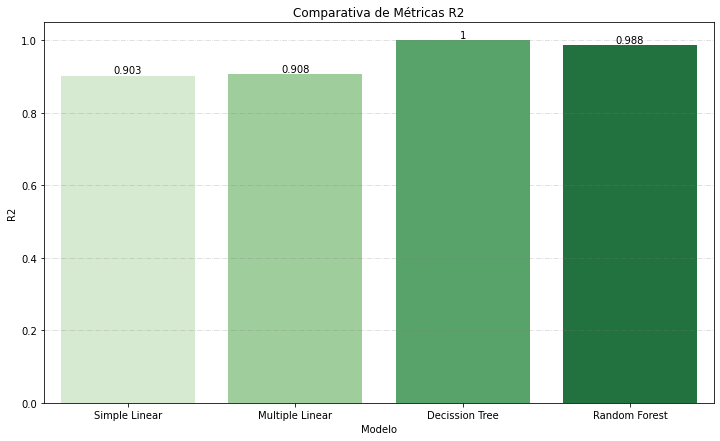

In [8]:
plt.figure(figsize = (12, 7))

ax = sbrn.barplot(x='MODEL', y='R2', data=model_metrics, palette='Greens')

for container in ax.containers:
    ax.bar_label(container)

plt.grid(axis='y', color='gray', linestyle='dashdot', alpha=0.3)
plt.title("Comparativa de Métricas R2")
plt.xlabel('Modelo')
plt.ylabel('R2')
plt.show()

Creo un gráfico para comparar las métricas **RMSE**:

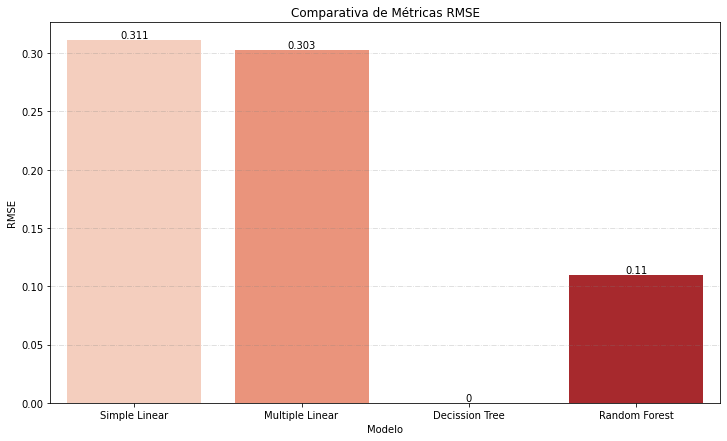

In [9]:
plt.figure(figsize = (12, 7))

ax = sbrn.barplot(x='MODEL', y='RMSE', data=model_metrics, palette='Reds')

for container in ax.containers:
    ax.bar_label(container)

plt.grid(axis='y', color='gray', linestyle='dashdot', alpha=0.3)
plt.title("Comparativa de Métricas RMSE")
plt.xlabel('Modelo')
plt.ylabel('RMSE')
plt.show()

---
## Exercici 3
Entrena’ls utilitzant els diferents paràmetres que admeten.

In [10]:
# Importo el dataframe "flights_scaled_std":
#flights_scaled_std = pandas.read_csv('./output/DelayedFlights_scaled_std.csv')

**Simple Linear Regression**  
No encontrado muchos parámetros para este modelo. El único que parece que puedo probar es **fit_intercept=False**, porque **normalize=True** está deprecado, y será eliminado en la versión '1.2'.

In [17]:
# Defino la variable independiente (solo 'DepDelay'):
X = flights_scaled_std[['DepDelay']]

# Defino la variable dependiente (solo 'ArrDelay'):
y = flights_scaled_std['ArrDelay']

# Creo una instancia de "linearRegression", y la aplico sobre "X" e "y":
simple_reg2 = LinearRegression(fit_intercept=False)
simple_reg2.fit(X, y)

# Utilizo la función "predict" para hacer predicciones con el modelo:
simple_reg2_pred = simple_reg2.predict(X)

In [18]:
# Obtengo y almaceno el R2:
simple_reg2_R2 = r2_score(y, simple_reg2_pred)

# Obtengo y almaceno el MSE:
simple_reg2_MSE = mean_squared_error(y, simple_reg2_pred)

print("Simple Linear Regression")
print(f"R2: {simple_reg2_R2:.3f}")
print(f"MSE: {simple_reg2_MSE:.3f}")

Simple Linear Regression
R2: 0.903
MSE: 0.097


**Multiple Linear Regression**  
La función es la misma que en el modelo anterior, asi que también utilizaré el parámetro **fit_intercept=False**.

In [19]:
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'ArrDelay'):
X = flights_scaled_std.drop('ArrDelay', axis=1)

# Defino la variable dependiente (solo 'ArrDelay'):
y = flights_scaled_std['ArrDelay']

# Creo una instancia de "linearRegression", y la aplico sobre "X" e "y":
multi_reg2 = LinearRegression(fit_intercept=False)
multi_reg2.fit(X, y)

# Utilizo la función "predict" para hacer predicciones con el modelo:
multi_reg2_pred = multi_reg2.predict(X)

In [20]:
# Obtengo y almaceno el R2:
multi_reg2_R2 = r2_score(y, multi_reg2_pred)

# Obtengo y almaceno el MSE:
multi_reg2_MSE = mean_squared_error(y, multi_reg2_pred)

print("Multiple Linear Regression")
print(f"R2: {multi_reg2_R2:.3f}")
print(f"MSE: {multi_reg2_MSE:.3f}")

Multiple Linear Regression
R2: 0.908
MSE: 0.092


**Decission Tree Regression**  
Poco puedo mejorar aquí. Los resultados fueron ridículamente buenos, y en menos de 5 minutos.  
Así que aprovecho para probar el parámetro **random_state=42**, que por alguna razón es muy común. Imagino que no afectará a los resultados, pero los anteriores son insuperables, y quizá irrepetibles.

In [21]:
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'ArrDelay'):
X = flights_scaled_std.drop('ArrDelay', axis=1)

# Defino la variable dependiente (solo 'ArrDelay'):
y = flights_scaled_std['ArrDelay']

# Creo una instancia de "DecisionTreeRegressor", y la aplico sobre "X" e "y":
tree_reg2 = DecisionTreeRegressor(random_state=42)
tree_reg2.fit(X, y)

# Utilizo la función "predict" para hacer predicciones con el modelo:
tree_reg2_pred = tree_reg2.predict(X)

In [22]:
# Obtengo y almaceno el R2:
tree_reg2_R2 = r2_score(y, tree_reg2_pred)

# Obtengo y almaceno el MSE:
tree_reg2_MSE = mean_squared_error(y, tree_reg2_pred)

print("Decission Tree Regressor")
print(f"R2: {tree_reg2_R2:.3f}")
print(f"MSE: {tree_reg2_MSE:.3f}")

Decission Tree Regressor
R2: 1.000
MSE: 0.000


**Random Forest Regression**  
Aquí tenemos un problema. La última vez se tiró 4 o 5 horas entrenando, y eso me parece inasumible, aunque es cierto que el resultado fue muy bueno.  
Comprobando los parámetros he visto que el valor por defecto de **n_estimators** es **100** desde la versión '0.22' de Scikit-Learn, siendo **10** antes de esa versión (la mía es la '1.0').  
Decido establecer el parámetro a **50**, con la esperanza de que eso influya notoriamente en el tiempo que ejecución.

In [23]:
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'ArrDelay'):
X = flights_scaled_std.drop('ArrDelay', axis=1)

# Defino la variable dependiente (solo 'ArrDelay'):
y = flights_scaled_std['ArrDelay']

# Creo una instancia de "RandomForestRegressor", y la aplico sobre "X" e "y":
forest_reg2 = RandomForestRegressor(random_state=0, n_estimators=50)
forest_reg2.fit(X, y)

# Utilizo la función "predict" para hacer predicciones con el modelo:
forest_reg2_pred = forest_reg2.predict(X)

In [24]:
# Obtengo y almaceno el R2:
forest_reg2_R2 = r2_score(y, forest_reg2_pred)

# Obtengo y almaceno el MSE:
forest_reg2_MSE = mean_squared_error(y, forest_reg2_pred)

print("Random Forest Regressor")
print(f"R2: {forest_reg2_R2:.3f}")
print(f"MSE: {forest_reg2_MSE:.3f}")

Random Forest Regressor
R2: 0.987
MSE: 0.013


> Los modelos **Simple Linear Regression** y **Multiple Linear Regression** dieron exactamente el mismo resultado con el parámetro **fit_intercept=False**. No esperaba cambios, pero es llamativo que no haya variado ni una décima.  
> El modelo **Decission Tree Regression** también se quedó exactamente igual con el parámetro **random_state=42**. Es normal que ese parámetro no cambie nada, pero me sigue sorprendiendo ese resutado tan perfecto.  
> En cuanto al modelo **Random Forest Regression**, el parámetro **n_estimators=50** mejoró notablemente el tiempo de ejecución, que fue de 1:30-2hs, y apenas afectó a los resultados, que solo empeoraron una milésima (tanto en **R2** como en **MSE**). Así se va a quedar ese parámetro en las próximas pruebas de este ejercicio, aunque la verdad es que sigue siendo mucho tiempo.

Comparo los resultados, añadiendo los nuevos

In [25]:
# Añado los nuevos resultados al dataframe "model_metrics":
model_metrics.loc[len(model_metrics)] = ['SimpleLin_Mod', 'Simple Linear', 'Standard', 'fit_intercept=False', round(simple_reg2_R2,3), round(simple_reg2_MSE,3), round(numpy.sqrt(simple_reg2_MSE),3)]
model_metrics.loc[len(model_metrics)] = ['MultipleLin_Mod', 'Multiple Linear', 'Standard', 'fit_intercept=False', round(multi_reg2_R2,3), round(multi_reg2_MSE,3), round(numpy.sqrt(multi_reg2_MSE),3)]
model_metrics.loc[len(model_metrics)] = ['DecissionTree_Mod', 'Decission Tree', 'Standard', 'random_state=42', round(tree_reg2_R2,3), round(tree_reg2_MSE,3), round(numpy.sqrt(tree_reg2_MSE),3)]
model_metrics.loc[len(model_metrics)] = ['RandomForest_Mod', 'Random Forest', 'Standard', 'random_state=0, n_estimators=50', round(forest_reg2_R2,3), round(forest_reg2_MSE,3), round(numpy.sqrt(forest_reg2_MSE),3)]

model_metrics

,NAME,MODEL,SCALAR,PARAMS,R2,MSE,RMSE
0,SimpleLin_Std,Simple Linear,Standard,NaN,0.903,0.097,0.311
1,MultipleLin_Std,Multiple Linear,Standard,NaN,0.908,0.092,0.303
2,DecissionTree_Std,Decission Tree,Standard,random_state=0,1.000,0.000,0.000
3,RandomForest_Std,Random Forest,Standard,random_state=0,0.988,0.012,0.110
4,SimpleLin_Mod,Simple Linear,Standard,fit_intercept=False,0.903,0.097,0.311
5,MultipleLin_Mod,Multiple Linear,Standard,fit_intercept=False,0.908,0.092,0.303
6,DecissionTree_Mod,Decission Tree,Standard,random_state=42,1.000,0.000,0.000
7,RandomForest_Mod,Random Forest,Standard,"random_state=0, n_estimators=50",0.987,0.013,0.112


In [27]:
# Comparo los resultados con una agrupación:
model_metrics.groupby(['NAME','MODEL']).max()[['R2','MSE']].sort_values(by=['R2','MSE'], ascending=[False, True])

,,R2,MSE
NAME,MODEL,,
DecissionTree_Mod,Decission Tree,1.000,0.000
DecissionTree_Std,Decission Tree,1.000,0.000
RandomForest_Std,Random Forest,0.988,0.012
RandomForest_Mod,Random Forest,0.987,0.013
MultipleLin_Mod,Multiple Linear,0.908,0.092
MultipleLin_Std,Multiple Linear,0.908,0.092
SimpleLin_Mod,Simple Linear,0.903,0.097
SimpleLin_Std,Simple Linear,0.903,0.097


Gráficas de métricas **R2** y **RMSE**:

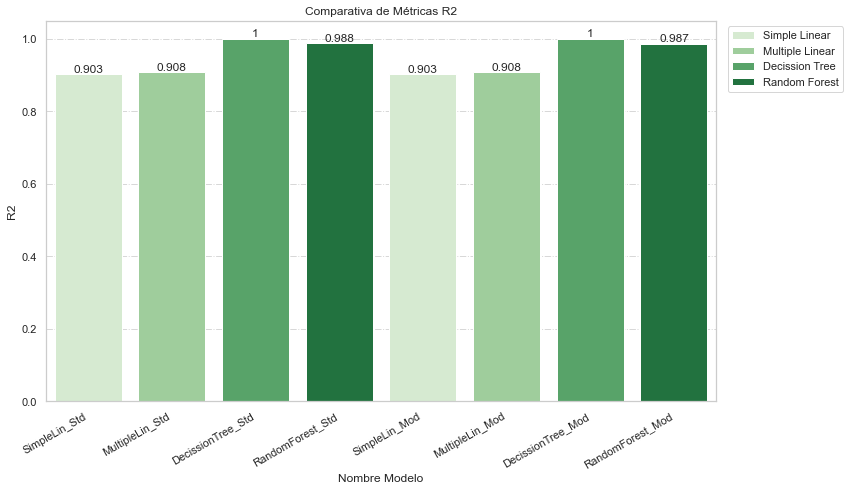

In [105]:
plt.figure(figsize = (12, 7))

ax = sbrn.barplot(x='NAME', y='R2', hue='MODEL', data=model_metrics, palette='Greens', dodge=False)

for container in ax.containers:
    ax.bar_label(container)
    
ax.legend(bbox_to_anchor=(1.01, 1))

plt.grid(axis='y', color='gray', linestyle='dashdot', alpha=0.3)
plt.title("Comparativa de Métricas R2")
plt.xlabel('Nombre Modelo')
plt.ylabel('R2')
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

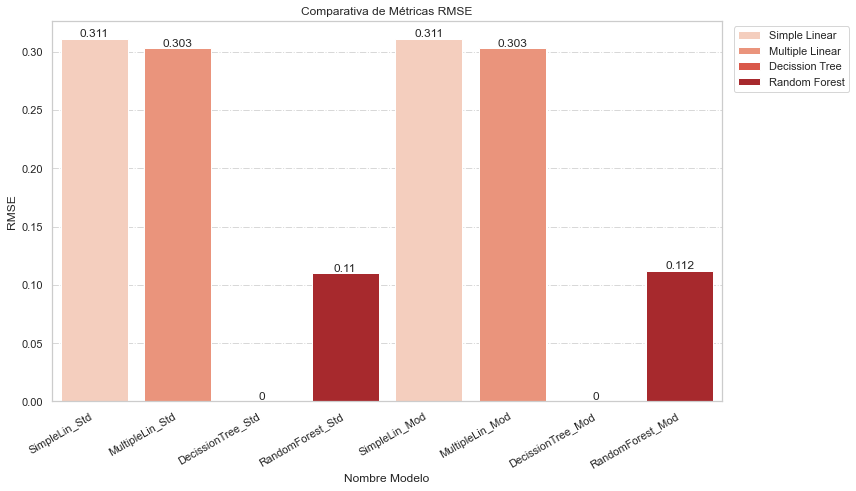

In [106]:
plt.figure(figsize = (12, 7))

ax = sbrn.barplot(x='NAME', y='RMSE', hue='MODEL', data=model_metrics, palette='Reds', dodge=False)

for container in ax.containers:
    ax.bar_label(container)
    
ax.legend(bbox_to_anchor=(1.01, 1))

plt.grid(axis='y', color='gray', linestyle='dashdot', alpha=0.3)
plt.title("Comparativa de Métricas RMSE")
plt.xlabel('Nombre Modelo')
plt.ylabel('RMSE')
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

---
## Exercici 4
Compara el seu rendiment utilitzant l’aproximació **traint/test** o utilitzant totes les dades (validació interna).

In [8]:
# Importo la función "train_test_split":
from sklearn.model_selection import train_test_split

**Simple Linear Regression**

In [6]:
# Defino la variable independiente (solo 'DepDelay'):
X = flights_scaled_std[['DepDelay']]

# Defino la variable dependiente (solo 'ArrDelay'):
y = flights_scaled_std['ArrDelay']

# Separo las partes de entrenamiento y de testeo, con la función "train_test_split":
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creo una instancia de "linearRegression", y la aplico sobre "train_X" y "train_y":
simple_reg3 = LinearRegression()
simple_reg3.fit(X_train, y_train)

# Utilizo la función "predict" para hacer predicciones con el modelo:
simple_reg3_pred = simple_reg3.predict(X_test)

In [7]:
# Obtengo y almaceno el R2:
simple_reg3_R2 = r2_score(y_test, simple_reg3_pred)

# Obtengo y almaceno el MSE:
simple_reg3_MSE = mean_squared_error(y_test, simple_reg3_pred)

print("Simple Linear Regression")
print(f"R2: {simple_reg3_R2:.3f}")
print(f"MSE: {simple_reg3_MSE:.3f}")

Simple Linear Regression
R2: 0.903
MSE: 0.096


**Multiple Linear Regression**

In [8]:
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'ArrDelay'):
X = flights_scaled_std.drop('ArrDelay', axis=1)

# Defino la variable dependiente (solo 'ArrDelay'):
y = flights_scaled_std['ArrDelay']

# Separo las partes de entrenamiento y de testeo, con la función "train_test_split":
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creo una instancia de "linearRegression", y la aplico sobre "X" e "y":
multi_reg3 = LinearRegression()
multi_reg3.fit(X_train, y_train)

# Utilizo la función "predict" para hacer predicciones con el modelo:
multi_reg3_pred = multi_reg3.predict(X_test)

In [9]:
# Obtengo y almaceno el R2:
multi_reg3_R2 = r2_score(y_test, multi_reg3_pred)

# Obtengo y almaceno el MSE:
multi_reg3_MSE = mean_squared_error(y_test, multi_reg3_pred)

print("Multiple Linear Regression")
print(f"R2: {multi_reg3_R2:.3f}")
print(f"MSE: {multi_reg3_MSE:.3f}")

Multiple Linear Regression
R2: -622208175530.460
MSE: 613584509117.797


**Decission Tree Regression**

In [15]:
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'ArrDelay'):
X = flights_scaled_std.drop('ArrDelay', axis=1)

# Defino la variable dependiente (solo 'ArrDelay'):
y = flights_scaled_std['ArrDelay']

# Separo las partes de entrenamiento y de testeo, con la función "train_test_split":
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creo una instancia de "DecisionTreeRegressor", y la aplico sobre "X_train" e "y_train":
tree_reg3 = DecisionTreeRegressor(random_state=0)
tree_reg3.fit(X_train, y_train)

# Utilizo la función "predict" para hacer predicciones con el modelo:
tree_reg3_pred = tree_reg3.predict(X_test)

In [16]:
# Obtengo y almaceno el R2:
tree_reg3_R2 = r2_score(y_test, tree_reg3_pred)

# Obtengo y almaceno el MSE:
tree_reg3_MSE = mean_squared_error(y_test, tree_reg3_pred)

print("Decission Tree Regressor")
print(f"R2: {tree_reg3_R2:.3f}")
print(f"MSE: {tree_reg3_MSE:.3f}")

Decission Tree Regressor
R2: 0.832
MSE: 0.166


**Random Forest Regression**

In [17]:
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'ArrDelay'):
X = flights_scaled_std.drop('ArrDelay', axis=1)

# Defino la variable dependiente (solo 'ArrDelay'):
y = flights_scaled_std['ArrDelay']

# Separo las partes de entrenamiento y de testeo, con la función "train_test_split":
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creo una instancia de "RandomForestRegressor", y la aplico sobre "X" e "y":
forest_reg3 = RandomForestRegressor(random_state=0, n_estimators=50)
forest_reg3.fit(X_train, y_train)

# Utilizo la función "predict" para hacer predicciones con el modelo:
forest_reg3_pred = forest_reg3.predict(X_test)

In [18]:
# Obtengo y almaceno el R2:
forest_reg3_R2 = r2_score(y_test, forest_reg3_pred)

# Obtengo y almaceno el MSE:
forest_reg3_MSE = mean_squared_error(y_test, forest_reg3_pred)

print("Random Forest Regressor")
print(f"R2: {forest_reg3_R2:.3f}")
print(f"MSE: {forest_reg3_MSE:.3f}")

Random Forest Regressor
R2: 0.912
MSE: 0.087


> El modelo **Simple Linear Regression** salió sorprendentemente bien parado de la prueba. mejorando incluso una milésima en el **MSE**.  
> Sin embargo, los resultados del modelo **Multiple Linear Regression** fueron catastóficamente malos (e incomprensibles). Tiene toda la pinta de ser un error, pero he revisado el código y está bien, y lo he ejecutado 3 o 4 veces, con el mismo resultado.  
> El modelo **Decission Tree Regression** está claro que es un ejemplo de **overfitting** de manual, porque con datos desconocidos sus resultados empeoraron notoriamente (más de lo que pensaba, de hecho).  
> Por su parte, el modelo **Random Forest Regression** pasó la prueba bastante airoso, empeorando muy poco sus métricas, y poniéndose en cabeza (cuando se dividen los datos en **train** y **test**).

In [35]:
# Añado los nuevos resultados al dataframe "model_metrics" (salvo los del modelo "Multiple Linear Regression" que hacen que se modifique la visualización de todos los valores):

model_metrics.loc[len(model_metrics)] = ['SimpleLin_Split', 'Simple Linear', 'Standard', '', round(simple_reg3_R2,3), round(simple_reg3_MSE,3), round(numpy.sqrt(simple_reg3_MSE),3)]
#model_metrics.loc[len(model_metrics)] = ['MultipleLin_Split', 'Multiple Linear', 'Standard', '', round(multi_reg3_R2,3), round(multi_reg3_MSE,3), round(numpy.sqrt(multi_reg3_MSE),3)]
model_metrics.loc[len(model_metrics)] = ['DecissionTree_Split', 'Decission Tree', 'Standard', 'random_state=0', round(tree_reg3_R2,3), round(tree_reg3_MSE,3), round(numpy.sqrt(tree_reg3_MSE),3)]
model_metrics.loc[len(model_metrics)] = ['RandomForest_Split', 'Random Forest', 'Standard', 'random_state=0, n_estimators=50', round(forest_reg3_R2,3), round(forest_reg3_MSE,3), round(numpy.sqrt(forest_reg3_MSE),3)]

model_metrics

,NAME,MODEL,SCALAR,PARAMS,R2,MSE,RMSE
0,SimpleLin_Std,Simple Linear,Standard,NaN,0.903,0.097,0.311
1,MultipleLin_Std,Multiple Linear,Standard,NaN,0.908,0.092,0.303
2,DecissionTree_Std,Decission Tree,Standard,random_state=0,1.000,0.000,0.000
3,RandomForest_Std,Random Forest,Standard,random_state=0,0.988,0.012,0.110
4,SimpleLin_Mod,Simple Linear,Standard,fit_intercept=False,0.903,0.097,0.311
5,MultipleLin_Mod,Multiple Linear,Standard,fit_intercept=False,0.908,0.092,0.303
6,DecissionTree_Mod,Decission Tree,Standard,random_state=42,1.000,0.000,0.000
7,RandomForest_Mod,Random Forest,Standard,"random_state=0, n_estimators=50",0.987,0.013,0.112
8,SimpleLin_Split,Simple Linear,Standard,,0.903,0.096,0.309
9,DecissionTree_Split,Decission Tree,Standard,random_state=0,0.832,0.166,0.407


In [36]:
# Comparo los resultados con una agrupación:
model_metrics.groupby(['NAME','MODEL']).max()[['R2','MSE']].sort_values(by=['R2','MSE'], ascending=[False, True])

,,R2,MSE
NAME,MODEL,,
DecissionTree_Mod,Decission Tree,1.000,0.000
DecissionTree_Std,Decission Tree,1.000,0.000
RandomForest_Std,Random Forest,0.988,0.012
RandomForest_Mod,Random Forest,0.987,0.013
RandomForest_Split,Random Forest,0.912,0.087
MultipleLin_Mod,Multiple Linear,0.908,0.092
MultipleLin_Std,Multiple Linear,0.908,0.092
SimpleLin_Split,Simple Linear,0.903,0.096
SimpleLin_Mod,Simple Linear,0.903,0.097


Gráficas de métricas **R2** y **RMSE**:  
**NOTA**: No aparecerán los resultados de la última prueba del modelo **Multiple Linear Regression**.

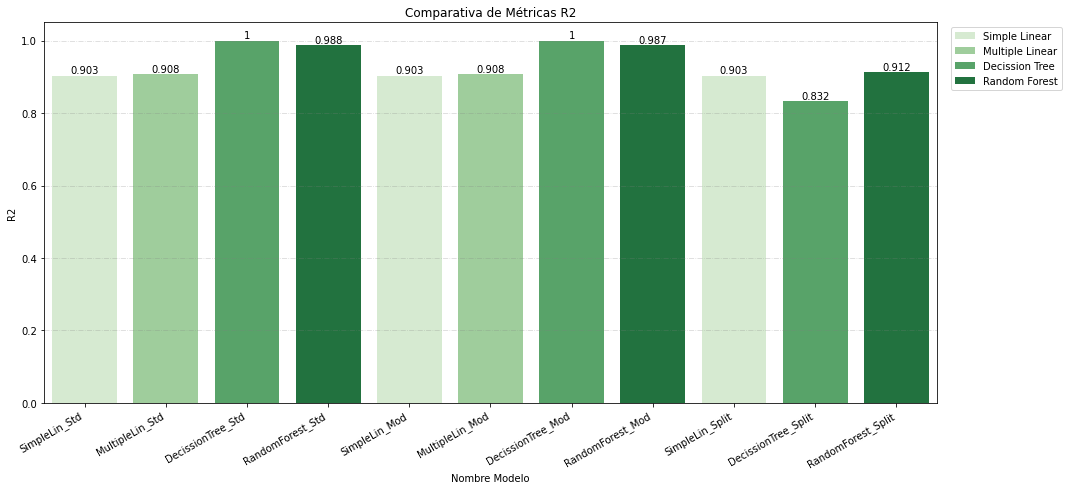

In [38]:
plt.figure(figsize = (16, 7))

ax = sbrn.barplot(x='NAME', y='R2', hue='MODEL', data=model_metrics, palette='Greens', dodge=False)

for container in ax.containers:
    ax.bar_label(container)
    
ax.legend(bbox_to_anchor=(1.01, 1))

plt.grid(axis='y', color='gray', linestyle='dashdot', alpha=0.3)
plt.title("Comparativa de Métricas R2")
plt.xlabel('Nombre Modelo')
plt.ylabel('R2')
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

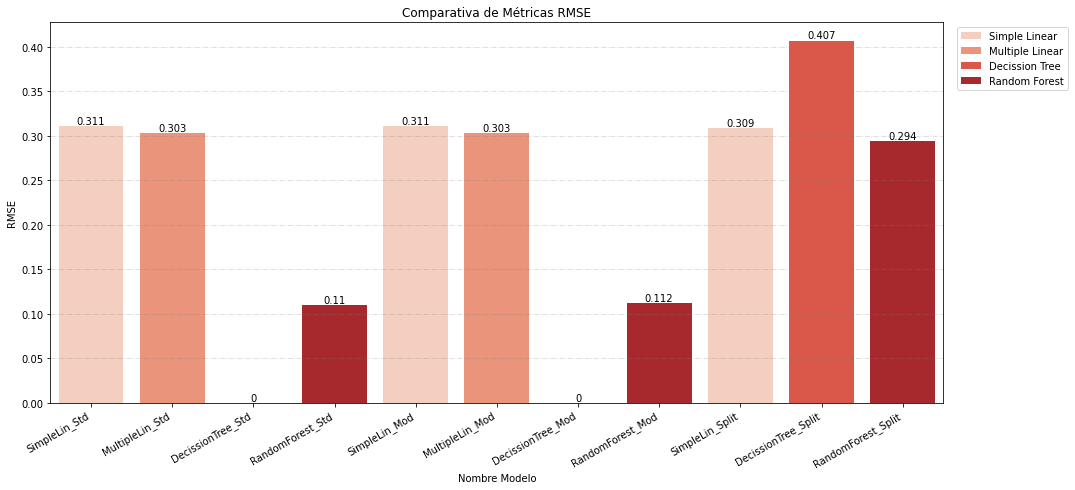

In [39]:
plt.figure(figsize = (16, 7))

ax = sbrn.barplot(x='NAME', y='RMSE', hue='MODEL', data=model_metrics, palette='Reds', dodge=False)

for container in ax.containers:
    ax.bar_label(container)
    
ax.legend(bbox_to_anchor=(1.01, 1))

plt.grid(axis='y', color='gray', linestyle='dashdot', alpha=0.3)
plt.title("Comparativa de Métricas RMSE")
plt.xlabel('Nombre Modelo')
plt.ylabel('RMSE')
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

---
## Exercici 5
Realitza algun procés d’enginyeria de variables per millorar-ne la predicció.  
**NOTA**: Realizar un proceso de ingeniería de variables significa usar el conocimiento que se tiene de los datos para crear, modificar y/o adaptar variables que puedan mejorar la asertividad de los algoritmos de machine learning que se apliquen. La idea pues en este ejercicio seria buscar la manera de mejorar los indicadores de acierto obtenidos en los ejercicios anteriores.

> Como expliqué al final del proceso de limpieza, en este ejercicio creo que encajaría la transformación que hice allí con unos cuantos registros de las columnas **DepTime** y **CRSArrTime**, aunque soy consciente de que es una solución casera y no del todo perfecta. 
> Aquí he preferido probar el escalado **RobustScaler**, en lugar de **StandardScaler**, que es el que utilicé en todos los ejercicios hasta ahora.

Importo la versión del dataframe posterior a la limpieza, y anterior al escalado:

In [49]:
# Importo el dataframe "flights_clean":
#flights_clean = pandas.read_csv('./output/DelayedFlights_clean.csv')

In [47]:
flights_clean

,CRSDepTime,DepTime,CRSArrTime,CRSElapsedTime,DepDelay,ArrDelay,UniqueCarrier,Origin,Dest,Distance,Date,Month,Day,DayOfWeek
0,1755,1829,1925,90,34,34,WN,IND,BWI,515,2008-01-03,1,3,4
1,1830,1937,1940,250,67,57,WN,IND,LAS,1591,2008-01-03,1,3,4
2,1510,1644,1725,135,94,80,WN,IND,MCO,828,2008-01-03,1,3,4
3,1425,1452,1625,240,27,15,WN,IND,PHX,1489,2008-01-03,1,3,4
4,1255,1323,1510,135,28,16,WN,IND,TPA,838,2008-01-03,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247481,830,921,1008,98,51,64,DL,ATL,PBI,545,2008-12-13,12,13,6
1247482,1520,1552,1718,58,32,17,DL,HSV,ATL,151,2008-12-13,12,13,6
1247483,1220,1250,1552,152,30,25,DL,MSP,ATL,906,2008-12-13,12,13,6
1247484,600,657,749,109,57,75,DL,RIC,ATL,481,2008-12-13,12,13,6


Escalo las columnas numéricas con **RobustScaler**:

In [50]:
# Importo la función "RobustScaler":
from sklearn.preprocessing import RobustScaler

# Uso la función "fit_transform" para escalar las variables (solo las numéricas):
scaled_rob = RobustScaler().fit_transform(flights_clean.select_dtypes(include=['int64']))

# Guardo los resultados en un dataframe:
flights_num_rob = pandas.DataFrame(scaled_rob, columns=flights_clean.select_dtypes(include=['int64']).columns)

flights_num_rob

,CRSDepTime,DepTime,CRSArrTime,CRSElapsedTime,DepDelay,ArrDelay,Distance,Month,Day,DayOfWeek
0,0.332353,0.293605,0.292647,-0.308642,-0.137255,-0.169811,-0.125392,-0.833333,-0.866667,0.0
1,0.442647,0.450581,0.314706,1.666667,0.509804,0.264151,1.561129,-0.833333,-0.866667,0.0
2,-0.027941,0.024709,-0.001471,0.246914,1.039216,0.698113,0.365204,-0.833333,-0.866667,0.0
3,-0.152941,-0.254360,-0.148529,1.543210,-0.274510,-0.528302,1.401254,-0.833333,-0.866667,0.0
4,-0.402941,-0.441860,-0.317647,0.246914,-0.254902,-0.509434,0.380878,-0.833333,-0.866667,0.0
...,...,...,...,...,...,...,...,...,...,...
1247481,-1.027941,-1.026163,-1.055882,-0.209877,0.196078,0.396226,-0.078370,1.000000,-0.200000,0.5
1247482,-0.013235,-0.109012,-0.011765,-0.703704,-0.176471,-0.490566,-0.695925,1.000000,-0.200000,0.5
1247483,-0.454412,-0.547965,-0.255882,0.456790,-0.215686,-0.339623,0.487461,1.000000,-0.200000,0.5
1247484,-1.366176,-1.409884,-1.436765,-0.074074,0.313725,0.603774,-0.178683,1.000000,-0.200000,0.5


Codifico las columnas categóricas con **get_dummies**:

In [51]:
# Codifico los valores de la columna 'UniqueCarrier':
flights_dumm_carrier = pandas.get_dummies(flights_clean['UniqueCarrier'], prefix='Carrier')

flights_dumm_carrier

,Carrier_9E,Carrier_AA,Carrier_AQ,Carrier_AS,Carrier_B6,Carrier_CO,Carrier_DL,Carrier_EV,Carrier_F9,Carrier_FL,Carrier_HA,Carrier_MQ,Carrier_NW,Carrier_OH,Carrier_OO,Carrier_UA,Carrier_US,Carrier_WN,Carrier_XE,Carrier_YV
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247481,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1247482,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1247483,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1247484,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
# Codifico los valores de la columna 'Origin':
flights_dumm_origin = pandas.get_dummies(flights_clean['Origin'], prefix='Origin')

flights_dumm_origin

,Origin_ABE,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,...,Origin_TYR,Origin_TYS,Origin_VLD,Origin_VPS,Origin_WRG,Origin_WYS,Origin_XNA,Origin_YAK,Origin_YKM,Origin_YUM
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247481,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1247482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1247483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1247484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# Codifico los valores de la columna 'Dest':
flights_dumm_dest = pandas.get_dummies(flights_clean['Dest'], prefix='Dest')

flights_dumm_dest


,Dest_ABE,Dest_ABI,Dest_ABQ,Dest_ABY,Dest_ACK,Dest_ACT,Dest_ACV,Dest_ACY,Dest_ADK,Dest_ADQ,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247481,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1247482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1247483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1247484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Concateno los 4 dataframes::

In [55]:
flights_scaled_rob = pandas.concat([flights_num_rob, flights_dumm_carrier, flights_dumm_origin, flights_dumm_dest], axis='columns')

flights_scaled_rob

,CRSDepTime,DepTime,CRSArrTime,CRSElapsedTime,DepDelay,ArrDelay,Distance,Month,Day,DayOfWeek,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
0,0.332353,0.293605,0.292647,-0.308642,-0.137255,-0.169811,-0.125392,-0.833333,-0.866667,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.442647,0.450581,0.314706,1.666667,0.509804,0.264151,1.561129,-0.833333,-0.866667,0.0,...,0,0,0,0,0,0,0,0,0,0
2,-0.027941,0.024709,-0.001471,0.246914,1.039216,0.698113,0.365204,-0.833333,-0.866667,0.0,...,0,0,0,0,0,0,0,0,0,0
3,-0.152941,-0.254360,-0.148529,1.543210,-0.274510,-0.528302,1.401254,-0.833333,-0.866667,0.0,...,0,0,0,0,0,0,0,0,0,0
4,-0.402941,-0.441860,-0.317647,0.246914,-0.254902,-0.509434,0.380878,-0.833333,-0.866667,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247481,-1.027941,-1.026163,-1.055882,-0.209877,0.196078,0.396226,-0.078370,1.000000,-0.200000,0.5,...,0,0,0,0,0,0,0,0,0,0
1247482,-0.013235,-0.109012,-0.011765,-0.703704,-0.176471,-0.490566,-0.695925,1.000000,-0.200000,0.5,...,0,0,0,0,0,0,0,0,0,0
1247483,-0.454412,-0.547965,-0.255882,0.456790,-0.215686,-0.339623,0.487461,1.000000,-0.200000,0.5,...,0,0,0,0,0,0,0,0,0,0
1247484,-1.366176,-1.409884,-1.436765,-0.074074,0.313725,0.603774,-0.178683,1.000000,-0.200000,0.5,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# Guardo una copia en CSV:
flights_scaled_rob.to_csv('./output/DelayedFlights_scaled_rob.csv', index=False)

---

In [11]:
# Importo librerias para aplicar y evaluar los modelos:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [7]:
# Importo el dataframe "flights_scaled_rob":
#flights_scaled_rob = pandas.read_csv('./output/DelayedFlights_scaled_Rob.csv')

**Simple Linear Regression**

In [12]:
# Defino la variable independiente (solo 'DepDelay'):
X = flights_scaled_rob[['DepDelay']]

# Defino la variable dependiente (solo 'ArrDelay'):
y = flights_scaled_rob['ArrDelay']

# Separo las partes de entrenamiento y de testeo, con la función "train_test_split":
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creo una instancia de "linearRegression", y la aplico sobre "train_X" y "train_y":
simple_reg4 = LinearRegression()
simple_reg4.fit(X_train, y_train)

# Utilizo la función "predict" para hacer predicciones con el modelo:
simple_reg4_pred = simple_reg4.predict(X_test)

In [13]:
# Obtengo y almaceno el R2:
simple_reg4_R2 = r2_score(y_test, simple_reg4_pred)

# Obtengo y almaceno el MSE:
simple_reg4_MSE = mean_squared_error(y_test, simple_reg4_pred)

print("Simple Linear Regression")
print(f"R2: {simple_reg4_R2:.3f}")
print(f"MSE: {simple_reg4_MSE:.3f}")

Simple Linear Regression
R2: 0.903
MSE: 0.126


**Decission Tree**

In [16]:
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'ArrDelay'):
X = flights_scaled_rob.drop('ArrDelay', axis=1)

# Defino la variable dependiente (solo 'ArrDelay'):
y = flights_scaled_rob['ArrDelay']

# Separo las partes de entrenamiento y de testeo, con la función "train_test_split":
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creo una instancia de "DecisionTreeRegressor", y la aplico sobre "X_train" e "y_train":
tree_reg4 = DecisionTreeRegressor(random_state=0)
tree_reg4.fit(X_train, y_train)

# Utilizo la función "predict" para hacer predicciones con el modelo:
tree_reg4_pred = tree_reg4.predict(X_test)

In [17]:
# Obtengo y almaceno el R2:
tree_reg4_R2 = r2_score(y_test, tree_reg4_pred)

# Obtengo y almaceno el MSE:
tree_reg4_MSE = mean_squared_error(y_test, tree_reg4_pred)

print("Decission Tree Regressor")
print(f"R2: {tree_reg4_R2:.3f}")
print(f"MSE: {tree_reg4_MSE:.3f}")

Decission Tree Regressor
R2: 0.831
MSE: 0.219


**Ramdom Forest**

In [18]:
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'ArrDelay'):
X = flights_scaled_rob.drop('ArrDelay', axis=1)

# Defino la variable dependiente (solo 'ArrDelay'):
y = flights_scaled_rob['ArrDelay']

# Separo las partes de entrenamiento y de testeo, con la función "train_test_split":
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creo una instancia de "RandomForestRegressor", y la aplico sobre "X" e "y":
forest_reg4 = RandomForestRegressor(random_state=0, n_estimators=50)
forest_reg4.fit(X_train, y_train)

# Utilizo la función "predict" para hacer predicciones con el modelo:
forest_reg4_pred = forest_reg4.predict(X_test)

In [19]:
# Obtengo y almaceno el R2:
forest_reg4_R2 = r2_score(y_test, forest_reg4_pred)

# Obtengo y almaceno el MSE:
forest_reg4_MSE = mean_squared_error(y_test, forest_reg4_pred)

print("Random Forest Regressor")
print(f"R2: {forest_reg4_R2:.3f}")
print(f"MSE: {forest_reg4_MSE:.3f}")

Random Forest Regressor
R2: 0.912
MSE: 0.114


> El modelo **Simple Linear Regression** empeoró un poco sus resultados en la métrica **MSE**.  
> El modelo **Multiple Linear Regression** volvió a dar resultados catastróficos, así que los he eliminado, y ya no volveré a utilizarlo en este ejercicio (parece que algo en la técnica **train/test** no le sienta bien).  
> El modelo **Decission Tree Regression** empeoró una milésima en la métrica **R2**, y bastante más en la métrica **MSE**.  
> Por su parte, el modelo **Random Forest Regression** también empeoró un poco en **MSE**.  
> Pues la verdad es que estos resultados son decepcionantes. Esperaba que **RobustScaler** mejorara las métricas.

In [21]:
# Añado los nuevos resultados al dataframe "model_metrics":
model_metrics.loc[len(model_metrics)] = ['SimpleLin_Rob', 'Simple Linear', 'Robust', '', round(simple_reg4_R2,3), round(simple_reg4_MSE,3), round(numpy.sqrt(simple_reg4_MSE),3)]
model_metrics.loc[len(model_metrics)] = ['DecissionTree_Rob', 'Decission Tree', 'Robust', 'random_state=0', round(tree_reg4_R2,3), round(tree_reg4_MSE,3), round(numpy.sqrt(tree_reg4_MSE),3)]
model_metrics.loc[len(model_metrics)] = ['RandomForest_Rob', 'Random Forest', 'Robust', 'random_state=0 | n_estimators=50', round(forest_reg4_R2,3), round(forest_reg4_MSE,3), round(numpy.sqrt(forest_reg4_MSE),3)]

model_metrics

,NAME,MODEL,SCALAR,PARAMS,R2,MSE,RMSE
0,SimpleLin_Std,Simple Linear,Standard,NaN,0.903,0.097,0.311
1,MultipleLin_Std,Multiple Linear,Standard,NaN,0.908,0.092,0.303
2,DecissionTree_Std,Decission Tree,Standard,random_state=0,1.000,0.000,0.000
3,RandomForest_Std,Random Forest,Standard,random_state=0,0.988,0.012,0.110
4,SimpleLin_Mod,Simple Linear,Standard,fit_intercept=False,0.903,0.097,0.311
5,MultipleLin_Mod,Multiple Linear,Standard,fit_intercept=False,0.908,0.092,0.303
6,DecissionTree_Mod,Decission Tree,Standard,random_state=42,1.000,0.000,0.000
7,RandomForest_Mod,Random Forest,Standard,random_state=0 | n_estimators=50,0.987,0.013,0.112
8,SimpleLin_Split,Simple Linear,Standard,NaN,0.903,0.096,0.309
9,DecissionTree_Split,Decission Tree,Standard,random_state=0,0.832,0.166,0.407


In [23]:
# Comparo los resultados con una agrupación:
model_metrics.groupby(['NAME','MODEL','SCALAR']).max()[['R2','MSE']].sort_values(by=['R2','MSE'], ascending=[False, True])

,,,R2,MSE
NAME,MODEL,SCALAR,,
DecissionTree_Mod,Decission Tree,Standard,1.000,0.000
DecissionTree_Std,Decission Tree,Standard,1.000,0.000
RandomForest_Std,Random Forest,Standard,0.988,0.012
RandomForest_Mod,Random Forest,Standard,0.987,0.013
RandomForest_Split,Random Forest,Standard,0.912,0.087
RandomForest_Rob,Random Forest,Robust,0.912,0.114
MultipleLin_Mod,Multiple Linear,Standard,0.908,0.092
MultipleLin_Std,Multiple Linear,Standard,0.908,0.092
SimpleLin_Split,Simple Linear,Standard,0.903,0.096


Gráficas de métricas **R2** y **RMSE**:

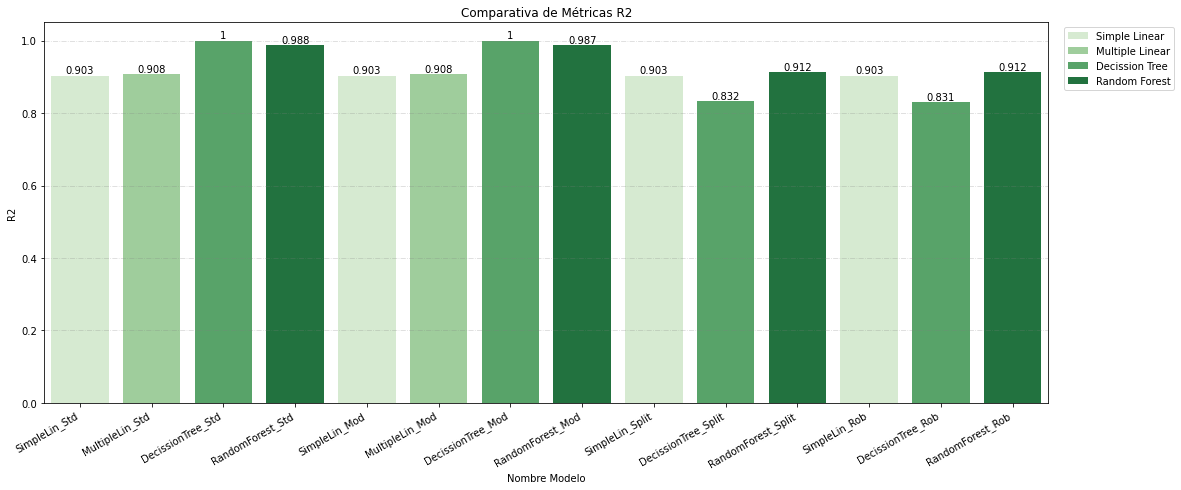

In [28]:
plt.figure(figsize = (18, 7))

ax = sbrn.barplot(x='NAME', y='R2', hue='MODEL', data=model_metrics, palette='Greens', dodge=False)

for container in ax.containers:
    ax.bar_label(container)
    
ax.legend(bbox_to_anchor=(1.01, 1))

plt.grid(axis='y', color='gray', linestyle='dashdot', alpha=0.3)
plt.title("Comparativa de Métricas R2")
plt.xlabel('Nombre Modelo')
plt.ylabel('R2')
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

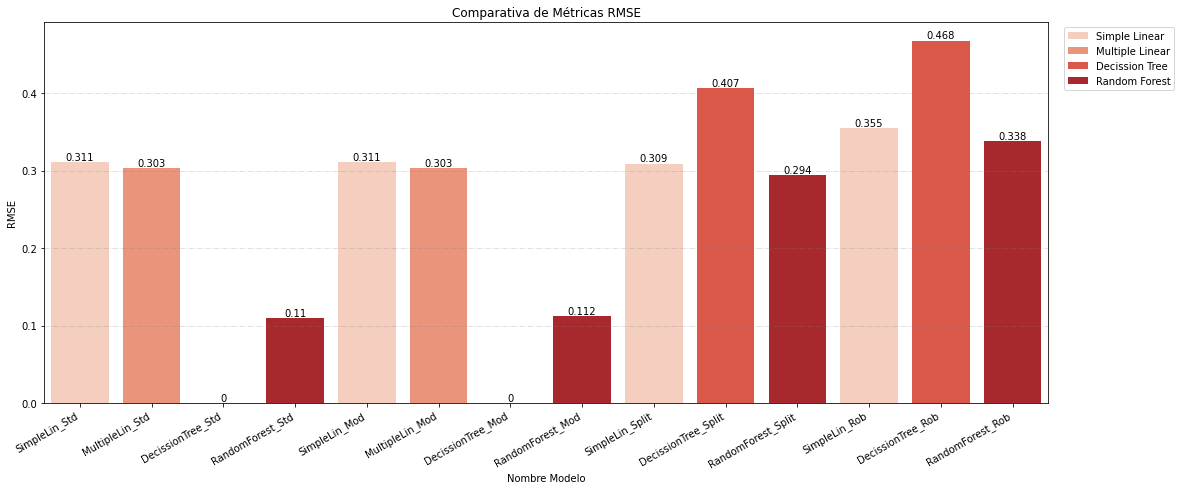

In [29]:
plt.figure(figsize = (18, 7))

ax = sbrn.barplot(x='NAME', y='RMSE', hue='MODEL', data=model_metrics, palette='Reds', dodge=False)

for container in ax.containers:
    ax.bar_label(container)
    
ax.legend(bbox_to_anchor=(1.01, 1))

plt.grid(axis='y', color='gray', linestyle='dashdot', alpha=0.3)
plt.title("Comparativa de Métricas RMSE")
plt.xlabel('Nombre Modelo')
plt.ylabel('RMSE')
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

---
## Exercici 6
No utilitzis la variable **DepDelay** a l’hora de fer prediccions.  
**NOTA**: Se trata de no usar la que presumiblemente es la variable que mejor ayuda para prever **ArrDelay**. Hay que buscar la manera de obtener el mejor rendimiento sin esa variable. Realizando solo un modelo o dos será suficiente. Hay que comparar los resultados con los obtenidos en los primeros ejercicios.

Importo el dataframe **flights_clean**, para volver a comprobar las correlaciones (con los dataframes que tienen columnas dummies no tiene mucho sentido, y tarda demasiado tiempo).

In [30]:
flights_clean = pandas.read_csv('./output/DelayedFlights_clean.csv')

flights_clean

,CRSDepTime,DepTime,CRSArrTime,CRSElapsedTime,DepDelay,ArrDelay,UniqueCarrier,Origin,Dest,Distance,Date,Month,Day,DayOfWeek
0,1755,1829,1925,90,34,34,WN,IND,BWI,515,2008-01-03,1,3,4
1,1830,1937,1940,250,67,57,WN,IND,LAS,1591,2008-01-03,1,3,4
2,1510,1644,1725,135,94,80,WN,IND,MCO,828,2008-01-03,1,3,4
3,1425,1452,1625,240,27,15,WN,IND,PHX,1489,2008-01-03,1,3,4
4,1255,1323,1510,135,28,16,WN,IND,TPA,838,2008-01-03,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247481,830,921,1008,98,51,64,DL,ATL,PBI,545,2008-12-13,12,13,6
1247482,1520,1552,1718,58,32,17,DL,HSV,ATL,151,2008-12-13,12,13,6
1247483,1220,1250,1552,152,30,25,DL,MSP,ATL,906,2008-12-13,12,13,6
1247484,600,657,749,109,57,75,DL,RIC,ATL,481,2008-12-13,12,13,6


Compruebo las correlaciones con la columna **ArrDelay**.  
Veo que la "ingeniería" que hice en la etapa de limpieza mejoró bastante la correlación con la variable **DepTime** (de **0,094** a **0,232**) y con la variable **CRSArrTime** (de **0,025** a **0,042**). Pero no es comparable con la correlación que tiene con la columna **DepDelay**, que no podemos utilizar en los modelos:

In [31]:
flights_clean.corr()['ArrDelay'].sort_values(ascending=False).round(3)

ArrDelay          1.000
DepDelay          0.950
DepTime           0.232
CRSArrTime        0.042
CRSElapsedTime    0.032
CRSDepTime        0.017
Distance          0.015
Month             0.012
DayOfWeek         0.012
Day               0.009
Name: ArrDelay, dtype: float64

<AxesSubplot:xlabel='ArrDelay', ylabel='DepDelay'>

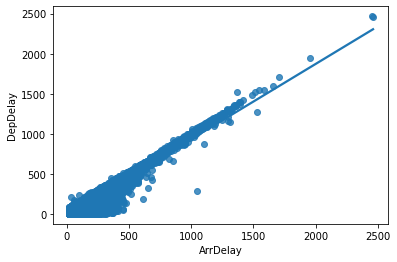

In [33]:
# Hago un gráfico para comprobar visualmente la correlación con la columna 'DepDelay':
sbrn.regplot(x='ArrDelay', y='DepDelay', data=flights_clean)

<AxesSubplot:xlabel='ArrDelay', ylabel='DepTime'>

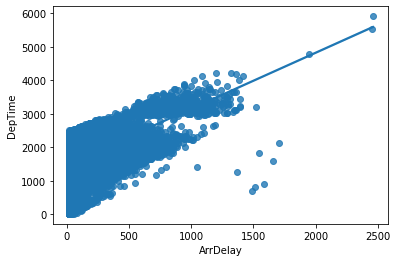

In [34]:
# Hago un gráfico para comprobar visualmente la correlación con la columna 'DepDelay':
sbrn.regplot(x='ArrDelay', y='DepTime', data=flights_clean)

Lo cierto es que visualmente no tiene tan mala pinta, pero está claro que las métricas empeorarán dramáticamente, sobre todo en el modelo **Simple Linear Regression**.  
Mi idea en este ejercicio es probar los 3 modelos sin la variable **DepDelay** (con el escalado **StandardScaler**, que va en cabeza) para ver los resultados, y posteriormente sugerir posibles soluciones.

In [36]:
# Importo el dataframe "flights_scaled_std":
flights_scaled_std = pandas.read_csv('./output/DelayedFlights_scaled_std.csv')

**Simple Linear Regression**

In [37]:
# Defino la variable independiente (solo 'DepTime', en lugar de 'DepDelay'):
X = flights_scaled_std[['DepTime']]

# Defino la variable dependiente (solo 'ArrDelay'):
y = flights_scaled_std['ArrDelay']

# Separo las partes de entrenamiento y de testeo, con la función "train_test_split":
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creo una instancia de "linearRegression", y la aplico sobre "train_X" y "train_y":
simple_reg5 = LinearRegression()
simple_reg5.fit(X_train, y_train)

# Utilizo la función "predict" para hacer predicciones con el modelo:
simple_reg5_pred = simple_reg5.predict(X_test)

In [38]:
# Obtengo y almaceno el R2:
simple_reg5_R2 = r2_score(y_test, simple_reg5_pred)

# Obtengo y almaceno el MSE:
simple_reg5_MSE = mean_squared_error(y_test, simple_reg5_pred)

print("Simple Linear Regression")
print(f"R2: {simple_reg5_R2:.3f}")
print(f"MSE: {simple_reg5_MSE:.3f}")

Simple Linear Regression
R2: 0.052
MSE: 0.934


**Decission Tree Regression**

In [39]:
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'ArrDelay' y 'DepDelay'):
X = flights_scaled_std.drop(['ArrDelay','DepDelay'], axis=1)

# Defino la variable dependiente (solo 'ArrDelay'):
y = flights_scaled_std['ArrDelay']

# Separo las partes de entrenamiento y de testeo, con la función "train_test_split":
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creo una instancia de "DecisionTreeRegressor", y la aplico sobre "X_train" e "y_train":
tree_reg5 = DecisionTreeRegressor(random_state=0)
tree_reg5.fit(X_train, y_train)

# Utilizo la función "predict" para hacer predicciones con el modelo:
tree_reg5_pred = tree_reg5.predict(X_test)

In [40]:
# Obtengo y almaceno el R2:
tree_reg5_R2 = r2_score(y_test, tree_reg5_pred)

# Obtengo y almaceno el MSE:
tree_reg5_MSE = mean_squared_error(y_test, tree_reg5_pred)

print("Decission Tree Regressor")
print(f"R2: {tree_reg5_R2:.3f}")
print(f"MSE: {tree_reg5_MSE:.3f}")

Decission Tree Regressor
R2: 0.825
MSE: 0.172


**Random Forest Regression**

In [43]:
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'ArrDelay' y 'DepDelay'):
X = flights_scaled_std.drop(['ArrDelay','DepDelay'], axis=1)

# Defino la variable dependiente (solo 'ArrDelay'):
y = flights_scaled_std['ArrDelay']

# Separo las partes de entrenamiento y de testeo, con la función "train_test_split":
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creo una instancia de "RandomForestRegressor", y la aplico sobre "X" e "y":
forest_reg5 = RandomForestRegressor(random_state=0, n_estimators=50)
forest_reg5.fit(X_train, y_train)

# Utilizo la función "predict" para hacer predicciones con el modelo:
forest_reg5_pred = forest_reg5.predict(X_test)

In [44]:
# Obtengo y almaceno el R2:
forest_reg5_R2 = r2_score(y_test, forest_reg5_pred)

# Obtengo y almaceno el MSE:
forest_reg5_MSE = mean_squared_error(y_test, forest_reg5_pred)

print("Random Forest Regressor")
print(f"R2: {forest_reg5_R2:.3f}")
print(f"MSE: {forest_reg5_MSE:.3f}")

Random Forest Regressor
R2: 0.905
MSE: 0.093


> Como era de esperar, el modelo **Simple Linear Regression** empeoró dramáticamente sus métricas, volviéndose inutil.  
> Sin embargo, el modelo **Decission Tree Regression** mantuvo sus resultados casi igual, lo que me sorprende bastante, la verdad.  
> En cuanto al modelo **Random Forest Regression**, también conservó valores similares en sus resultados, empeorando muy poco.

In [45]:
# Añado los nuevos resultados al dataframe "model_metrics":
model_metrics.loc[len(model_metrics)] = ['SimpleLin_Trunc', 'Simple Linear', 'Standard', '', round(simple_reg5_R2,3), round(simple_reg5_MSE,3), round(numpy.sqrt(simple_reg5_MSE),3)]
model_metrics.loc[len(model_metrics)] = ['DecissionTree_Trunc', 'Decission Tree', 'Standard', 'random_state=0', round(tree_reg5_R2,3), round(tree_reg5_MSE,3), round(numpy.sqrt(tree_reg5_MSE),3)]
model_metrics.loc[len(model_metrics)] = ['RandomForest_Trunc', 'Random Forest', 'Standard', 'random_state=0 | n_estimators=50', round(forest_reg5_R2,3), round(forest_reg5_MSE,3), round(numpy.sqrt(forest_reg5_MSE),3)]

model_metrics

,NAME,MODEL,SCALAR,PARAMS,R2,MSE,RMSE
0,SimpleLin_Std,Simple Linear,Standard,NaN,0.903,0.097,0.311
1,MultipleLin_Std,Multiple Linear,Standard,NaN,0.908,0.092,0.303
2,DecissionTree_Std,Decission Tree,Standard,random_state=0,1.000,0.000,0.000
3,RandomForest_Std,Random Forest,Standard,random_state=0,0.988,0.012,0.110
4,SimpleLin_Mod,Simple Linear,Standard,fit_intercept=False,0.903,0.097,0.311
5,MultipleLin_Mod,Multiple Linear,Standard,fit_intercept=False,0.908,0.092,0.303
6,DecissionTree_Mod,Decission Tree,Standard,random_state=42,1.000,0.000,0.000
7,RandomForest_Mod,Random Forest,Standard,random_state=0 | n_estimators=50,0.987,0.013,0.112
8,SimpleLin_Split,Simple Linear,Standard,NaN,0.903,0.096,0.309
9,DecissionTree_Split,Decission Tree,Standard,random_state=0,0.832,0.166,0.407


In [49]:
# Comparo los resultados con una agrupación:
model_metrics.groupby(['NAME','MODEL','SCALAR']).max()[['R2','MSE']].sort_values(by=['R2','MSE'], ascending=[False, True])

,,,R2,MSE
NAME,MODEL,SCALAR,,
DecissionTree_Mod,Decission Tree,Standard,1.000,0.000
DecissionTree_Std,Decission Tree,Standard,1.000,0.000
RandomForest_Std,Random Forest,Standard,0.988,0.012
RandomForest_Mod,Random Forest,Standard,0.987,0.013
RandomForest_Split,Random Forest,Standard,0.912,0.087
RandomForest_Rob,Random Forest,Robust,0.912,0.114
MultipleLin_Mod,Multiple Linear,Standard,0.908,0.092
MultipleLin_Std,Multiple Linear,Standard,0.908,0.092
RandomForest_Trunc,Random Forest,Standard,0.905,0.093


Gráficas de métricas **R2** y **RMSE**  
Comparo esta última prueba solamente con la prueba anterior en la que se ha usado el mismo escalado (**StandardScaler**), y la técnica **train/test**, que también he utilizado en esta última.

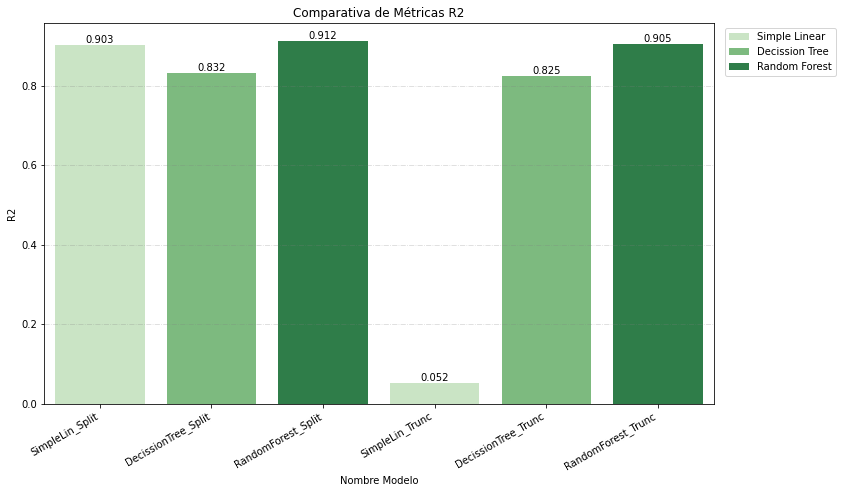

In [59]:
plt.figure(figsize = (12, 7))

ax = sbrn.barplot(x='NAME', y='R2', hue='MODEL', data=model_metrics.loc[[8,9,10,14,15,16]], palette='Greens', dodge=False)

for container in ax.containers:
    ax.bar_label(container)
    
ax.legend(bbox_to_anchor=(1.01, 1))

plt.grid(axis='y', color='gray', linestyle='dashdot', alpha=0.3)
plt.title("Comparativa de Métricas R2")
plt.xlabel('Nombre Modelo')
plt.ylabel('R2')
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

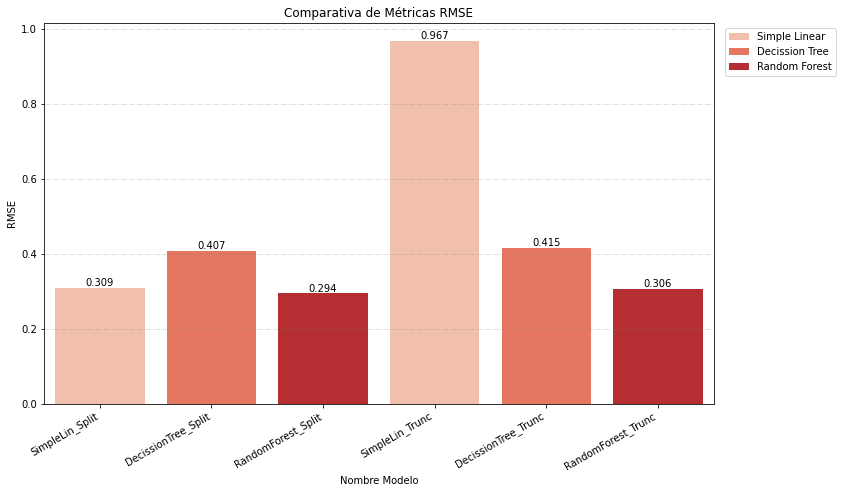

In [60]:
plt.figure(figsize = (12, 7))

ax = sbrn.barplot(x='NAME', y='RMSE', hue='MODEL', data=model_metrics.loc[[8,9,10,14,15,16]], palette='Reds', dodge=False)

for container in ax.containers:
    ax.bar_label(container)
    
ax.legend(bbox_to_anchor=(1.01, 1))

plt.grid(axis='y', color='gray', linestyle='dashdot', alpha=0.3)
plt.title("Comparativa de Métricas RMSE")
plt.xlabel('Nombre Modelo')
plt.ylabel('RMSE')
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

> Lo que se me ocurre que se puede hacer para contrarestar la falta de la columna **DepDelay** es calcularla, en base a las columnas **CRSDepTime** y **DepTime**, pero eso sería como hacerse trampas al solitario.  
> Otra opción que se me ocurre es calcular la velocidad media, y utlizarla (junto a las columnas **Distance** y **DepTime**) para hacer otra columna similar a **CRSArrTime**, pero no sé si serviría de mucho.  
> En cualquier caso, creo que ya me currado lo suficiente estos ejercicios como para ir dejándolo por aquí, xD. Está claro que el modelo **Random Forest** es muy bueno, pero también es muy engorroso el tiempo que tarda en ejecutarse.

Creo que para acabar es conveniente hacer unas gráficas comparativas de los modelos en los que he utilizado la técnica **train/test** (que da resultados mas reales), y el escalado **StandardScaler** (que inesperadamente ha superado a **RobustScaler**).  
Con esas gráficas podremos concluir cual es el mejor modelo de los que he probado en estos ejercicios.

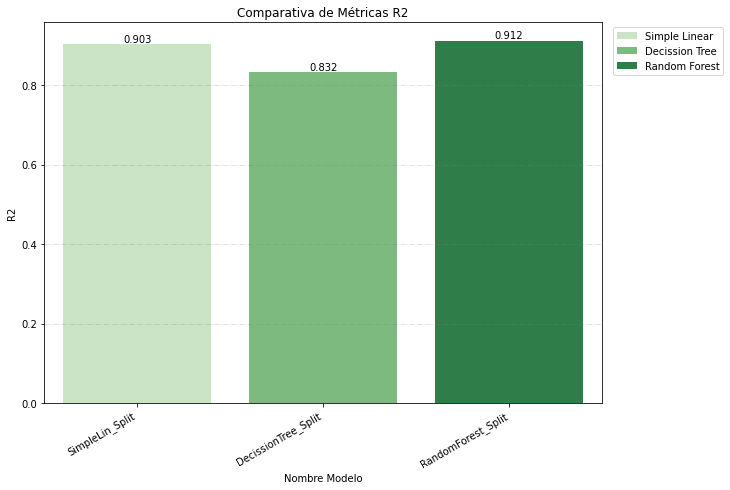

In [61]:
plt.figure(figsize = (10, 7))

ax = sbrn.barplot(x='NAME', y='R2', hue='MODEL', data=model_metrics.loc[[8,9,10]], palette='Greens', dodge=False)

for container in ax.containers:
    ax.bar_label(container)
    
ax.legend(bbox_to_anchor=(1.01, 1))

plt.grid(axis='y', color='gray', linestyle='dashdot', alpha=0.3)
plt.title("Comparativa de Métricas R2")
plt.xlabel('Nombre Modelo')
plt.ylabel('R2')
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

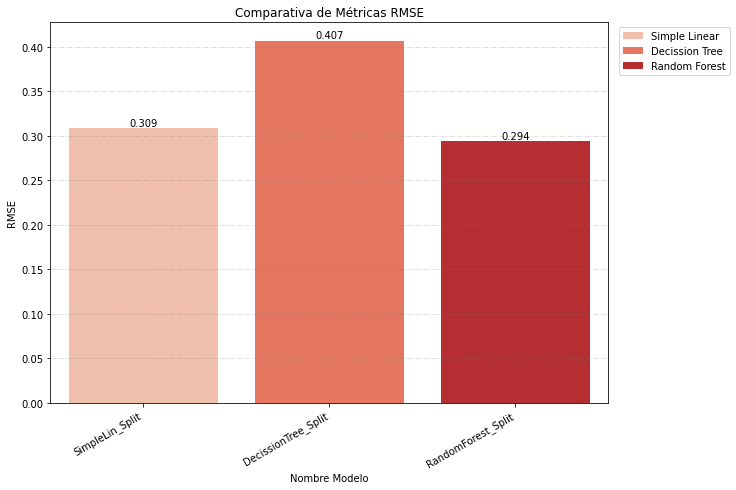

In [62]:
plt.figure(figsize = (10, 7))

ax = sbrn.barplot(x='NAME', y='RMSE', hue='MODEL', data=model_metrics.loc[[8,9,10]], palette='Reds', dodge=False)

for container in ax.containers:
    ax.bar_label(container)
    
ax.legend(bbox_to_anchor=(1.01, 1))

plt.grid(axis='y', color='gray', linestyle='dashdot', alpha=0.3)
plt.title("Comparativa de Métricas RMSE")
plt.xlabel('Nombre Modelo')
plt.ylabel('RMSE')
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

> Sorprendentemente, el modelo **Simple Linear Regression** superó al modelo **Decission Tree** en las dos métricas, pero también ha quedado claro que para dar buenos resultados necesita una variable muy correlacionada con la variable objetivo.  
> Y como era de esperar, el modelo **Random Forest** resultó ganador, pero por muy poco, y su elevado tiempo de ejecución requiere plantearse en qué circunstancias vale la pena utilizarlo.

---
## Exercici Extra
Antes de acabar el ejercicio, tengo curiosidad por probar los modelos **LASSO Regression**, **Ridge Regression** y **ElasticNet Regression** (cruzando los dedos para que no tarden mucho).  
Los probaré con la aproximación que considero más adecuada de los anteriores ejercicios (**train/test** + **StandardScaler**).

In [5]:
# Importo las librerias necesarias:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV

In [6]:
# Importo el dataframe "flights_scaled_std":
flights_scaled_std = pandas.read_csv('./output/DelayedFlights_scaled_std.csv')

**LASSO Regression**

In [7]:
# Defino la variable independiente (solo 'DepDelay'):
X = flights_scaled_std[['DepDelay']]

# Defino la variable dependiente (solo 'ArrDelay'):
y = flights_scaled_std['ArrDelay']

# Separo las partes de entrenamiento y de testeo, con la función "train_test_split":
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creo una instancia de "linearRegression", y la aplico sobre "X_train" e "y_train":
lasso_reg = LassoCV()
lasso_reg.fit(X_train, y_train)

# Utilizo la función "predict" para hacer predicciones con el modelo:
lasso_reg_pred = lasso_reg.predict(X_test)

In [8]:
# Obtengo y almaceno el R2:
lasso_reg_R2 = r2_score(y_test, lasso_reg_pred)

# Obtengo y almaceno el MSE:
lasso_reg_MSE = mean_squared_error(y_test, lasso_reg_pred)

print("Lasso Regression")
print(f"R2: {lasso_reg_R2:.3f}")
print(f"MSE: {lasso_reg_MSE:.3f}")

Lasso Regression
R2: 0.903
MSE: 0.096


**Ridge Regression**

In [9]:
# Defino la variable independiente (solo 'DepDelay'):
X = flights_scaled_std[['DepDelay']]

# Defino la variable dependiente (solo 'ArrDelay'):
y = flights_scaled_std['ArrDelay']

# Separo las partes de entrenamiento y de testeo, con la función "train_test_split":
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creo una instancia de "linearRegression", y la aplico sobre "X_train" e "y_train":
ridge_reg = RidgeCV()
ridge_reg.fit(X_train, y_train)

# Utilizo la función "predict" para hacer predicciones con el modelo:
ridge_reg_pred = ridge_reg.predict(X_test)

In [10]:
# Obtengo y almaceno el R2:
ridge_reg_R2 = r2_score(y_test, ridge_reg_pred)

# Obtengo y almaceno el MSE:
ridge_reg_MSE = mean_squared_error(y_test, ridge_reg_pred)

print("Ridge Regression")
print(f"R2: {ridge_reg_R2:.3f}")
print(f"MSE: {ridge_reg_MSE:.3f}")

Ridge Regression
R2: 0.903
MSE: 0.096


**ElasticNet Regression**

In [11]:
# Defino la variable independiente (solo 'DepDelay'):
X = flights_scaled_std[['DepDelay']]

# Defino la variable dependiente (solo 'ArrDelay'):
y = flights_scaled_std['ArrDelay']

# Separo las partes de entrenamiento y de testeo, con la función "train_test_split":
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creo una instancia de "linearRegression", y la aplico sobre "X_train" e "y_train":
elastic_reg = ElasticNetCV()
elastic_reg.fit(X_train, y_train)

# Utilizo la función "predict" para hacer predicciones con el modelo:
elastic_reg_pred = elastic_reg.predict(X_test)

In [12]:
# Obtengo y almaceno el R2:
elastic_reg_R2 = r2_score(y_test, elastic_reg_pred)

# Obtengo y almaceno el MSE:
elastic_reg_MSE = mean_squared_error(y_test, elastic_reg_pred)

print("ElasticNet Regression")
print(f"R2: {elastic_reg_R2:.3f}")
print(f"MSE: {elastic_reg_MSE:.3f}")

ElasticNet Regression
R2: 0.903
MSE: 0.096


> Resultados no exentos de sorpresas, porque los 3 modelos obtuvieron exactamente los mismos valores, sin variar una décima.  
> Por otra parte, el tiempo de ejecución fue 0. Tardaron lo mismo que el modelo **Linear Regression** (o sea, nada).

In [13]:
# Añado los nuevos resultados al dataframe "model_metrics":
model_metrics.loc[len(model_metrics)] = ['Lasso_Split', 'Lasso', 'Standard', '', round(lasso_reg_R2,3), round(lasso_reg_MSE,3), round(numpy.sqrt(lasso_reg_MSE),3)]
model_metrics.loc[len(model_metrics)] = ['Ridge_Split', 'Ridge', 'Standard', '', round(ridge_reg_R2,3), round(ridge_reg_MSE,3), round(numpy.sqrt(ridge_reg_MSE),3)]
model_metrics.loc[len(model_metrics)] = ['ElasticNet_Split', 'ElasticNet', 'Standard', '', round(elastic_reg_R2,3), round(elastic_reg_MSE,3), round(numpy.sqrt(elastic_reg_MSE),3)]

model_metrics

,NAME,MODEL,SCALAR,PARAMS,R2,MSE,RMSE
0,SimpleLin_Std,Simple Linear,Standard,NaN,0.903,0.097,0.311
1,MultipleLin_Std,Multiple Linear,Standard,NaN,0.908,0.092,0.303
2,DecissionTree_Std,Decission Tree,Standard,random_state=0,1.000,0.000,0.000
3,RandomForest_Std,Random Forest,Standard,random_state=0,0.988,0.012,0.110
4,SimpleLin_Mod,Simple Linear,Standard,fit_intercept=False,0.903,0.097,0.311
5,MultipleLin_Mod,Multiple Linear,Standard,fit_intercept=False,0.908,0.092,0.303
6,DecissionTree_Mod,Decission Tree,Standard,random_state=42,1.000,0.000,0.000
7,RandomForest_Mod,Random Forest,Standard,random_state=0 | n_estimators=50,0.987,0.013,0.112
8,SimpleLin_Split,Simple Linear,Standard,NaN,0.903,0.096,0.309
9,DecissionTree_Split,Decission Tree,Standard,random_state=0,0.832,0.166,0.407


Gráficas de métricas **R2** y **RMSE**  
Comparo solamente las pruebas en las que se ha usado el escalado **StandardScaler** y la técnica **train/test**, como en esta última prueba.

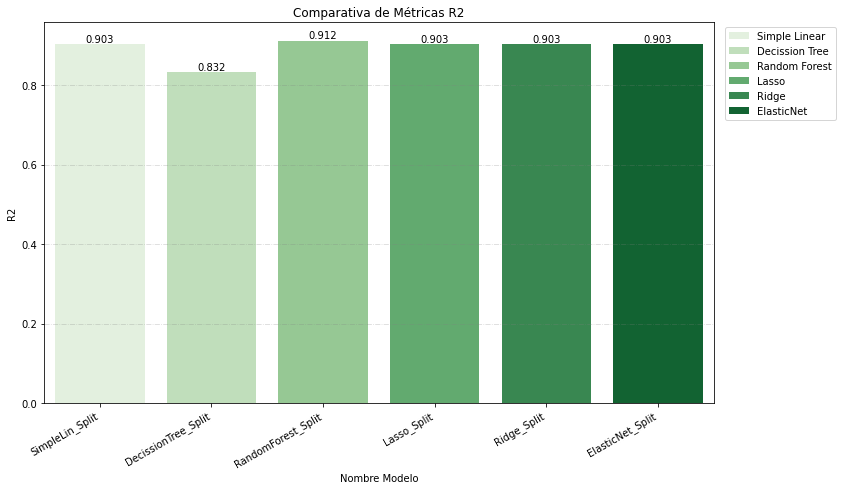

In [15]:
plt.figure(figsize = (12, 7))

ax = sbrn.barplot(x='NAME', y='R2', hue='MODEL', data=model_metrics.loc[[8,9,10,17,18,19]], palette='Greens', dodge=False)

for container in ax.containers:
    ax.bar_label(container)
    
ax.legend(bbox_to_anchor=(1.01, 1))

plt.grid(axis='y', color='gray', linestyle='dashdot', alpha=0.3)
plt.title("Comparativa de Métricas R2")
plt.xlabel('Nombre Modelo')
plt.ylabel('R2')
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

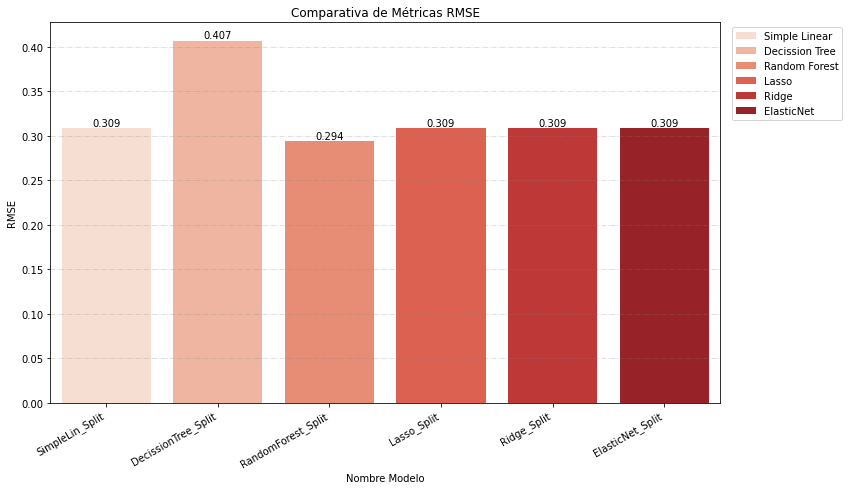

In [16]:
plt.figure(figsize = (12, 7))

ax = sbrn.barplot(x='NAME', y='RMSE', hue='MODEL', data=model_metrics.loc[[8,9,10,17,18,19]], palette='Reds', dodge=False)

for container in ax.containers:
    ax.bar_label(container)
    
ax.legend(bbox_to_anchor=(1.01, 1))

plt.grid(axis='y', color='gray', linestyle='dashdot', alpha=0.3)
plt.title("Comparativa de Métricas RMSE")
plt.xlabel('Nombre Modelo')
plt.ylabel('RMSE')
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

> Por muy poco, pero sigue siendo ganador el modelo **Random Forest** en las dos métricas. Está claro que de algo le sirven las horas que se tira entrenando.  
> Pero también queda claro que para hacer una prueba rápida, los modelos mas adecuados son estos 3 últimos (superando a **Decission Tree**, que da peores resultados, y tarda unos minutos).

---